# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)
- [By Column]
    - []()
    - []()

## setup

### Import libraries

In [472]:
import pandas as pd
import numpy as np
import os
import json
import ast
#use this to find union of multiple lists
from functools import reduce

#plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

#pandas options
pd.options.display.max_columns = 100

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


### import data

In [473]:
os.listdir(merged_data_path)

['merged_tweets.csv',
 'merged_users.csv',
 'wordle_games.csv',
 'wordle_games.pkl']

In [474]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [475]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [476]:
users.set_index('id', inplace = True)
#when it comes to drop_duplicates, any NaNs are not considered duplicate values.
# any repeated rows with NaNs must be dealt with.
users.drop_duplicates(inplace=True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [477]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(322781, 145718)

### tweets and users NaNs

In [478]:
#pick out tweets columns with any null values
tweets.loc[:, tweets.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322781 entries, 1521733018293084160 to 1520127509051944961
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   entities             102105 non-null  object 
 1   context_annotations  318753 non-null  object 
 2   referenced_tweets    32501 non-null   object 
 3   in_reply_to_user_id  30326 non-null   float64
 4   attachments          3588 non-null    object 
 5   geo                  5057 non-null    object 
 6   withheld             4 non-null       object 
dtypes: float64(1), object(6)
memory usage: 19.7+ MB


In [479]:
tweets.loc[:, tweets.isna().any()].head(4)

,entities,context_annotations,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,
1521733018293084160,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...","[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733015738662913,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...","[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733011414257664,NaN,"[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733010504445954,NaN,"[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN


In [480]:
#show some non-NaN `referenced_tweets`
tweets[[ not tweet for tweet in tweets['referenced_tweets'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",3.316225e+08,NaN,NaN,NaN
1521732989977305088,1493048111366877185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@misfortunateApe @SamuelAlpha77 @1kisfud @SumP...,"[{'domain': {'id': '30', 'name': 'Entities [En...",866231099135070208,2022-05-04 06:06:31+00:00,"[{'type': 'replied_to', 'id': '152168705041154...",1.275839e+18,NaN,NaN,NaN
1521732967764140032,1495295658353315840,everyone,th,"{'urls': [{'start': 43, 'end': 66, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",เวิร์ดเดล 98 4/6\n\n🟩⬜🟨🟨⬜\n🟩🟨⬜🟩⬜\n🟩⬜⬜⬜⬜\n🟩🟩🟩🟩🟩...,NaN,946067305879842819,2022-05-04 06:06:26+00:00,"[{'type': 'replied_to', 'id': '152081469439032...",9.460673e+17,NaN,NaN,NaN
1521732951439945728,1510513887988264964,everyone,en,NaN,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜🟩⬜🟨⬜\n⬜🟩🟩🟩🟩\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",904515648327442433,2022-05-04 06:06:22+00:00,"[{'type': 'replied_to', 'id': '152139649722441...",9.045156e+17,NaN,NaN,NaN


In [481]:
#show some non-NaN `attachments`
tweets[[ not tweet for tweet in tweets['attachments'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521732559331282951,1521732559331282951,everyone,en,"{'urls': [{'start': 28, 'end': 51, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 2/6\n\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩 https://t.co/HU...,"[{'domain': {'id': '30', 'name': 'Entities [En...",371437967,2022-05-04 06:04:49+00:00,NaN,NaN,{'media_keys': ['16_1521732551106310145']},NaN,NaN
1521732521775534081,1521731955376762880,everyone,es,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",@itsbroWken Wordle (ES) #118 3/6\n\n🟨⬜🟨🟨⬜\n🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",887430842980675588,2022-05-04 06:04:40+00:00,"[{'type': 'replied_to', 'id': '152173195537676...",1.291470e+18,{'media_keys': ['16_1521732511805714432']},NaN,NaN
1521731301337878528,1521731301337878528,everyone,en,"{'urls': [{'start': 34, 'end': 57, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\n\n🟨⬜⬜🟩⬜\n⬜🟨🟩🟩🟨\n🟩🟩🟩🟩🟩 https://...,"[{'domain': {'id': '30', 'name': 'Entities [En...",303183839,2022-05-04 05:59:49+00:00,NaN,NaN,{'media_keys': ['16_1521731293393960960']},NaN,NaN
1521730995371724800,1521730995371724800,everyone,en,"{'urls': [{'start': 41, 'end': 64, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle 318 4/6*\n\n⬛⬛🟩⬛⬛\n⬛⬛🟩⬛⬛\n⬛🟨🟩⬛⬛\n🟩🟩🟩🟩🟩 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2849167760,2022-05-04 05:58:36+00:00,NaN,NaN,{'media_keys': ['3_1521730992079130624']},NaN,NaN


In [482]:
#show some non-NaN `geo`
tweets[[ not tweet for tweet in tweets['geo'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521732543334211586,1521732543334211586,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\n\n⬜⬜🟨🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",304032557,2022-05-04 06:04:45+00:00,NaN,NaN,NaN,{'place_id': '206c436ce43a43a3'},NaN
1521732291222925312,1521732291222925312,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Phew! \n\nWordle 259 6/6\n\n⬜🟩⬜⬜🟩\n⬜🟩🟩⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18830193,2022-05-04 06:03:45+00:00,NaN,NaN,NaN,{'place_id': '173c2bb9d42baaa5'},NaN
1521731264428003332,1521731264428003332,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 2/6\n\n🟨⬛🟩⬛🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",55833883,2022-05-04 05:59:40+00:00,NaN,NaN,NaN,{'place_id': '5c0761bdffa0cb64'},NaN
1521731243641118722,1521731243641118722,everyone,tr,"{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Ehh bence 🙄\nWordle Türkçe 319 5/6*\n\n⬜⬜🟨🟨⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",45346113,2022-05-04 05:59:35+00:00,NaN,NaN,NaN,{'place_id': '57d9f7248731be9a'},NaN


In [483]:
#show some non-NaN `withheld`
tweets[[ not tweet for tweet in tweets['withheld'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521425660459290624,1521425660459290624,everyone,en,"{'hashtags': [{'start': 47, 'end': 57, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 5/6\r\n\r\n⬛🟩⬛⬛⬛\r\n⬛🟩🟨⬛⬛\r\n🟨🟩⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-03 09:45:18+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1521097766205861889,1521097766205861889,everyone,en,"{'hashtags': [{'start': 47, 'end': 57, 'tag': ...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 317 5/6\r\n\r\n🟩⬛⬛⬛🟨\r\n🟩⬛🟩⬛🟨\r\n🟩🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-02 12:02:22+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1520760168279072774,1520760168279072774,everyone,en,"{'hashtags': [{'start': 41, 'end': 51, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 4/6\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n🟨🟩⬛⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-01 13:40:53+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1520348164930351104,1520348164930351104,everyone,en,"{'hashtags': [{'start': 35, 'end': 45, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 315 3/6\r\n\r\n⬛🟩🟨⬛⬛\r\n⬛🟩⬛🟨🟨\r\n🟩🟩🟩🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-04-30 10:23:43+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"


Columns with nulls in tweets are:

- `entities`
    these are all fake-json. Formatted with single quotes instead of doubles. "json-like"
- `context_annotations`
    list of json-likes.
- `referenced_tweets`
    list of json-likes
- `in_reply_to_user_id`
    integers of user ids if the tweet is a reply. replace with 0.
- `attachments`
    json-like
- `geo`
    json-like
- `withheld`
    json-like.


Nulls should be filled with the same type.

Json-likes should be empty string JSONs: '{}'

Lists of json-likes should be empty lists: '[]'

the integer `in_reply...` replace with integer 0.


In [484]:
# do all these NaN replacements.
json_likes = ['entities', 'attachments', 'geo', 'withheld']
lists_of_json_likes = ['context_annotations','referenced_tweets']

tweets[json_likes] = tweets[json_likes].fillna('{}')
tweets[lists_of_json_likes] = tweets[lists_of_json_likes].fillna('[]')
tweets['in_reply_to_user_id'].fillna(0, inplace=True)
tweets.head(5)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{}
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{}


In [485]:
#no remaining cells are null.
tweets.isna().sum().sum()

0

In [486]:
#some of the tweets are duplicates.
tweets.duplicated().sum()

16364

In [487]:
#drop them.
tweets.drop_duplicates(keep='first', inplace=True)

In [488]:
#even with dropped duplicates, some tweets still have the same id as another.
tweets[tweets.index.duplicated()].head()

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{}
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\r\n\r\nWordle 319 3/6\r\n\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{}


In [489]:
#an example of a remaining duplicated tweet.
tweets.loc[tweets[tweets.index.duplicated()].index[0]]

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}


In [490]:
# drop any tweets that simply have the same id. Keep one of each with matching id.
dupe_indices = tweets.index.duplicated(keep='first')
tweets.drop(index = tweets.index[dupe_indices], inplace=True)
tweets.head()

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{}
1521730008259207168,1521730008259207168,everyone,en,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{}
1521729451511500800,1521729451511500800,everyone,es,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{}
1521728602018131969,1521728602018131969,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\n\n🟩⬜⬜⬜🟨\n🟩🟩⬜⬜⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1380674268132872193,2022-05-04 05:49:05+00:00,[],0.0,{},{},{}
1521728195023994880,1521728195023994880,everyone,ja,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",今日は割とストレートに正解\nWordle 319 5/6\n\n⬛⬛🟨🟨⬛\n🟩🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",133317415,2022-05-04 05:47:28+00:00,[],0.0,{},{},{}


In [491]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238108 entries, 1521730729775968257 to 1520127509051944961
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   conversation_id      238108 non-null  int64  
 1   reply_settings       238108 non-null  object 
 2   lang                 238108 non-null  object 
 3   entities             238108 non-null  object 
 4   possibly_sensitive   238108 non-null  bool   
 5   source               238108 non-null  object 
 6   public_metrics       238108 non-null  object 
 7   text                 238108 non-null  object 
 8   context_annotations  238108 non-null  object 
 9   author_id            238108 non-null  int64  
 10  created_at           238108 non-null  object 
 11  referenced_tweets    238108 non-null  object 
 12  in_reply_to_user_id  238108 non-null  float64
 13  attachments          238108 non-null  object 
 14  geo                  238108 non-null 

About 150000 tweets remain after dropping duplicates. There was a lot of redundancy in the original data.

### check nans in users

In [492]:
# look at columns with any nans in users
users.loc[:, users.isna().any()].head()

,name,url,description,location,entities,pinned_tweet_id,withheld
id,,,,,,,
1.006111e+18,Jose Antonio,NaN,"Antiguo usuario bloqueado por error, pero he v...","Alcalá de Guadaíra, Spain",NaN,NaN,NaN
3.600020e+08,Ana V Garcia,https://t.co/uMfikCmd0I,NaN,Alcalá de Henares,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,"Grand Rapids, MI",NaN,NaN,NaN
8.620779e+08,John Milton ✊,https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",Spain,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
5.311651e+07,christopher jones,NaN,I don't like cricket. oh no. i love it!,sheffield,NaN,NaN,NaN


In [493]:
# look at info for these columns
users.loc[:, users.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 145718 entries, 1.006110502043472e+18 to 55866913.0
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             145715 non-null  object 
 1   url              45997 non-null   object 
 2   description      129228 non-null  object 
 3   location         104501 non-null  object 
 4   entities         63405 non-null   object 
 5   pinned_tweet_id  72208 non-null   float64
 6   withheld         1 non-null       object 
dtypes: float64(1), object(6)
memory usage: 8.9+ MB


In [494]:
#look at the single "withheld" user.
users[users['withheld'].notnull()]

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
5663832.0,Ali 🔥,"{'followers_count': 246, 'following_count': 37...",https://t.co/ncsbcZfaw1,• For the heart and soul of the country • RTs ...,https://pbs.twimg.com/profile_images/135222168...,neither here nor there,False,AliAsifPTI,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",7.893531e+17,{'country_codes': ['IN']}


Columns in users with NaNs:
- `name`
    a string. replace with empty string.
- `url`
    string
- `description`
    string
- `location`
    string
- `entities`
    json-like
- `pinned_tweet_id`
    integer. tweet id.
- `withheld`
    it appears a small number of users can be withheld by country, not just tweets.
    json-like

In [495]:
#fill missing values in user columns.
json_likes = ['entities', 'withheld']
string_cols = ['name', 'url', 'description', 'location']

users[json_likes] = users[json_likes].fillna('{}')
users[string_cols] = users[string_cols].fillna('')
users['pinned_tweet_id'].fillna(0, inplace = True)
users.head()

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,{},0.0,{}
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,{},0.0,{}
8.620779e+08,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
5.311651e+07,christopher jones,"{'followers_count': 189, 'following_count': 26...",,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,{},0.0,{}


In [496]:
#no remaining cells are null.
users.isna().sum().sum()

0

In [497]:
#no user rows are found with .duplicated()...
users.duplicated().sum()

0

In [498]:
#...but like tweets, a lot of user records are still duplicated even after cleaning out nulls.
users[users.index.duplicated()].head()

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
2.231839e+08,Javier Alonso,"{'followers_count': 2102, 'following_count': 1...",https://t.co/BxsFs87PC5,Trabajo en @rtve De Tierra de Campos a la ribe...,https://pbs.twimg.com/profile_images/146055062...,Talavera - Toledo,False,fjalmar,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,{}
2.151868e+08,Bert Pollheimer,"{'followers_count': 529, 'following_count': 81...",,Remainers know what has been lost. Brexiteers...,https://pbs.twimg.com/profile_images/118903011...,East Midlands,False,bhp1905,False,{},0.000000e+00,{}
1.516012e+18,chutypon,"{'followers_count': 41, 'following_count': 47,...",,El yogurt natural con ositos de gominolas es l...,https://pbs.twimg.com/profile_images/151601305...,"Olesa de Montserrat, España",False,chutypon,False,{},1.521710e+18,{}
1.102890e+08,vemödalen⁷🦋,"{'followers_count': 1142, 'following_count': 1...",,📷 🍃\ntransformo el oxígeno en dióxido de carbo...,https://pbs.twimg.com/profile_images/143146868...,98' liner,False,ivybIuee,False,{},1.448487e+18,{}
1.426148e+09,Eugene,"{'followers_count': 1292, 'following_count': 1...",https://t.co/hLajDZbBIW,"Interesting, interested.",https://pbs.twimg.com/profile_images/105219850...,"New York, NY",False,Eugene646,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,{}


In [499]:
%%time
# drop any users that simply have the same id. Keep one of each with matching id.
dupe_indices = users.index.duplicated(keep='first')
users.drop(index = users.index[dupe_indices], inplace=True)
users.head()

Wall time: 209 ms


,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
8.937763e+17,Rubén Andrés Felipe,"{'followers_count': 106, 'following_count': 28...",,,https://pbs.twimg.com/profile_images/149180089...,,False,ruanfe02,False,{},0.000000e+00,{}
2.138439e+07,Jacqueline Queeley,"{'followers_count': 44, 'following_count': 62,...",,"I am me. Good or bad, I'm me. Music loving, tr...",https://pbs.twimg.com/profile_images/114956032...,"E-Town, Canada Eh?!?!",False,JacqueQueeley,False,{},1.097729e+18,{}
4.840513e+07,Daniel McIlroy,"{'followers_count': 69, 'following_count': 104...",https://t.co/fzu728bNVJ,Vocals and rhythm guitar🎸,https://pbs.twimg.com/profile_images/590460556...,Toronto,False,dfmcilroy,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.484640e+18,{}
3.756835e+08,Joseph Whelan,"{'followers_count': 12, 'following_count': 69,...",,,https://abs.twimg.com/sticky/default_profile_i...,,False,sospanjfach,False,{},0.000000e+00,{}
2.613886e+08,Kerry 🇺🇦,"{'followers_count': 657, 'following_count': 34...",,"I'm sarcastic, if you don't realise this, I ca...",https://pbs.twimg.com/profile_images/145438282...,"Northants, England",False,kezt88,False,{},0.000000e+00,{}


In [500]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49459 entries, 8.937762989585736e+17 to 2992397222.0
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               49459 non-null  object 
 1   public_metrics     49459 non-null  object 
 2   url                49459 non-null  object 
 3   description        49459 non-null  object 
 4   profile_image_url  49459 non-null  object 
 5   location           49459 non-null  object 
 6   protected          49459 non-null  bool   
 7   username           49459 non-null  object 
 8   verified           49459 non-null  bool   
 9   entities           49459 non-null  object 
 10  pinned_tweet_id    49459 non-null  float64
 11  withheld           49459 non-null  object 
dtypes: bool(2), float64(1), object(9)
memory usage: 4.2+ MB


Distinct users is now down to about 50,000 from the original 150,000.

### merge tweets and users on tweet id.

In [501]:
#the merged df should have as many records as tweets.

#tweets-users dataframe
tweets['id_tweets_copy'] = tweets.index
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf.head()


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0
1521730008259207168,1521730008259207168,everyone,en,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}
1521729451511500800,1521729451511500800,everyone,es,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}
1521728602018131969,1521728602018131969,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\n\n🟩⬜⬜⬜🟨\n🟩🟩⬜⬜⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1380674268132872193,2022-05-04 05:49:05+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0
1521728195023994880,1521728195023994880,everyone,ja,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",今日は割とストレートに正解\nWordle 319 5/6\n\n⬛⬛🟨🟨⬛\n🟩🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",133317415,2022-05-04 05:47:28+00:00,[],0.0,{},{},{},虹乃,"{'followers_count': 838, 'following_count': 10...",https://t.co/lfV53CDfSX,主にジャンプとスクエニに育てられた少年まんが留年生。成人済。好きなものについてはツイフィに書...,https://pbs.twimg.com/profile_images/128579829...,ジャンショとポケセンのあるところ,False,mnijino,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.300316e+18,{}


In [502]:
#look at info for new merged dataframe.
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238108 entries, 1521730729775968257 to 1520127509051944961
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       238108 non-null  int64  
 1   reply_settings        238108 non-null  object 
 2   lang                  238108 non-null  object 
 3   entities_tweet        238108 non-null  object 
 4   possibly_sensitive    238108 non-null  bool   
 5   source                238108 non-null  object 
 6   public_metrics_tweet  238108 non-null  object 
 7   text                  238108 non-null  object 
 8   context_annotations   238108 non-null  object 
 9   author_id             238108 non-null  int64  
 10  created_at            238108 non-null  object 
 11  referenced_tweets     238108 non-null  object 
 12  in_reply_to_user_id   238108 non-null  float64
 13  attachments           238108 non-null  object 
 14  geo                  

users

    json_likes = ['entities', 'withheld']


tweets

    json_likes = ['entities', 'attachments', 'geo', 'withheld']
    lists_of_json_likes = ['context_annotations','referenced_tweets']

In [503]:
json_cols_in_tudf = ['entities_tweet',
            'withheld_tweet',
            'public_metrics_tweet',
            'public_metrics_user',
            'geo',
            'withheld_user',
            'entities_user']

json_list_cols_in_tudf = [
            'context_annotations',
            'referenced_tweets'
]

In [504]:
# show the json-like columns in tudf
tudf[json_cols_in_tudf].head()

,entities_tweet,withheld_tweet,public_metrics_tweet,public_metrics_user,geo,withheld_user,entities_user
tweet_id,,,,,,,
1521730729775968257,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",{},"{'retweet_count': 1, 'reply_count': 0, 'like_c...",0,{},0,0
1521730008259207168,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 1037, 'following_count': 1...",{'place_id': '206c436ce43a43a3'},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521729451511500800,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 1037, 'following_count': 1...",{'place_id': '206c436ce43a43a3'},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521728602018131969,{},{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,{},0,0
1521728195023994880,{},{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 838, 'following_count': 10...",{},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."


In [505]:
#show the lists of jsons in tudf
tudf[json_list_cols_in_tudf]

,context_annotations,referenced_tweets
tweet_id,,
1521730729775968257,"[{'domain': {'id': '30', 'name': 'Entities [En...","[{'type': 'retweeted', 'id': '1521716069936902..."
1521730008259207168,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521729451511500800,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521728602018131969,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521728195023994880,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
...,...,...
1520127578593726464,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1520127576676704256,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1520127566845149185,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]


In [506]:
tudf.head(3)

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0
1521730008259207168,1521730008259207168,everyone,en,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}
1521729451511500800,1521729451511500800,everyone,es,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}


## format jsons with double quotes instead of single

This isn't just a matter of changing all single quotes into doubles, because there is an example of a value enclosed by rare double quotes to start, and containing a single quote.

luckily, ast.literal_eval magically solves this problem for us. It doesn't even require json.loads().

In [507]:
#example of literal_eval turning a json-like-but-with-single-quotes string into a python dict.
ast.literal_eval(
    tudf.iloc[0]['entities_tweet']
)

{'urls': [{'start': 62,
   'end': 85,
   'url': 'https://t.co/ExpdWbFM3J',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'}],
 'mentions': [{'start': 3,
   'end': 12,
   'username': 'chutypon',
   'id': '1516012410993356811'}]}

In [508]:
###################################################
# No need for this function with ast.literal_eval()
# Made before I knew about the above function.
###################################################


# Turns all json-like strings with single quotes for keys and values will have those quotes changed into doubles quotes.
# Any single quote within double quotes (like in object 2846) will be turned 
def singleq_to_doubleq(some_string):
    new_string = some_string.replace("""'""",'''"''')
    return new_string
    

In [509]:
#test it out
singleq_to_doubleq('''aejkrha;ebglaerghlajerhar;tha'erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf'ns'rtn'srtna]''')

'aejkrha;ebglaerghlajerhar;tha"erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf"ns"rtn"srtna]'

In [510]:
###################################################
# No need for this function with ast.literal_eval()
###################################################
# replace single quotes with double quotes in strings in a pandas series
def series_singleq_to_doubleq(pandas_series):
    new_series = pandas_series.apply(lambda some_string: singleq_to_doubleq(some_string) )
    return new_series

###########
# use this!
###########
#goes straight from json-looking-but-with-single-quotes strings to a list of dicts using ast.literal_eval()
def series_literal_eval(pandas_series):
    new_series = list(map(lambda some_string: ast.literal_eval(some_string), list(pandas_series)))
    return new_series

In [520]:
#try out series_literal_eval
entities_tweet_list = series_literal_eval(tudf['entities_tweet'])
entities_tweet_list

[{'urls': [{'start': 62,
    'end': 85,
    'url': 'https://t.co/ExpdWbFM3J',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com'}],
  'mentions': [{'start': 3,
    'end': 12,
    'username': 'chutypon',
    'id': '1516012410993356811'}]},
 {'urls': [{'start': 48,
    'end': 71,
    'url': 'https://t.co/Z0yOBqoghS',
    'expanded_url': 'https://wordle.danielfrg.com/tildes/index.html',
    'display_url': 'wordle.danielfrg.com/tildes/index.h…'}]},
 {'urls': [{'start': 75,
    'end': 98,
    'url': 'https://t.co/jqQBxqkfSy',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com'}]},
 {},
 {},
 {},
 {},
 {'urls': [{'start': 67,
    'end': 90,
    'url': 'https://t.co/RCsAVHZjmt',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com'}],
  'mentions': [{'start': 3,
    'end': 17,
    'username': 'irimiabarroso',
    'id': '194179893'}]},
 {},
 {'urls': [{'start': 49,
  

---
### get all keys for all json columns

Refer to these later when expanding the json columns.

In [521]:
# gives the set of keys that show up in a list of dicts.

def get_dict_keys(list_of_dicts):
    key_ring = [
        list(entry.keys())
        for entry in list_of_dicts
    ]
    return list(reduce(np.union1d, key_ring))

In [522]:
json_cols_minus_context = ['entities_tweet',
 'public_metrics_tweet',
 'public_metrics_user',
 'entities_user']

In [524]:
# %%time
# col_keys = []
# for column in json_cols_minus_context:
#     col_keys.append([column,get_dict_keys(series_literal_eval(tudf[column]))])

In [525]:
# col_keys_pd = [
#     keys
#     for keys in col_keys
# ]

In [526]:
# pd.DataFrame(col_keys_pd, columns = ['json column','keys']).to_markdown()

|    | json column          | keys                                                                  |
|---:|:---------------------|:----------------------------------------------------------------------|
|  0 | entities_tweet       | ['annotations', 'cashtags', 'hashtags', 'mentions', 'urls']           |
|  1 | public_metrics_tweet | ['like_count', 'quote_count', 'reply_count', 'retweet_count']         |
|  2 | public_metrics_user  | ['followers_count', 'following_count', 'listed_count', 'tweet_count'] |
|  3 | entities_user        | ['description', 'url']                                                |

In [527]:
#pandas has its own function that turns "semi-structured" json into a flat table.

#expand entities_tweet column
pd.json_normalize(entities_tweet_list)

,urls,mentions,hashtags,annotations,cashtags
0,"[{'start': 62, 'end': 85, 'url': 'https://t.co...","[{'start': 3, 'end': 12, 'username': 'chutypon...",NaN,NaN,NaN
1,"[{'start': 48, 'end': 71, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
2,"[{'start': 75, 'end': 98, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
238103,NaN,NaN,NaN,NaN,NaN
238104,NaN,NaN,NaN,NaN,NaN
238105,NaN,NaN,NaN,NaN,NaN
238106,NaN,NaN,NaN,NaN,NaN


In [528]:
#expand entities_user column
# pd.json_normalize(series_literal_eval(tudf['entities_user']))

In [529]:
#expand public metrics user columns
#pd.json_normalize(series_literal_eval(tudf['public_metrics_user']))

In [530]:
#expand public metrics tweet column
#pd.json_normalize(series_literal_eval(tudf['public_metrics_tweet']))

In [531]:
# takes in a pandas DataFrame, a list of JSON-like columns, expands the columns into their own
# DataFrame with the set of all keys as columns, properly assigns the original tweet index,
# and joins the results onto the original.

def expand_json_cols(pandas_dataframe, json_cols, inplace = False, drop_json_cols = False):
    #save the original index. confirmed it creates a new object, not a link to the last one
    original_index = pandas_dataframe.index
    #make a new dataframe to return if not altering the original
    if not inplace:
        new_df = pandas_dataframe.copy()
    # perform the merges over all the json_cols
    for column in json_cols:
        #create a new DataFrame from the column's jsons.
        new_json_df = pd.json_normalize(series_literal_eval(pandas_dataframe[column]))
        #assign the same indices as the original df to prepare for join
        new_json_df.index = pandas_dataframe.index
        #rename columns with a prefix so they are tracable and don't overwrite
        new_json_df = new_json_df.add_prefix(column)
        #join the expanded json columns to the original data
        if inplace:
            pandas_dataframe = pd.merge(pandas_dataframe, new_json_df, how = 'left')
            if drop_json_cols:
                pandas_dataframe.drop(columns = column, inplace = True)
        else:
            new_df = new_df.join(new_json_df)
            if drop_json_cols:
                new_df.drop(columns = column, inplace = True)
    #when that's done, return the result
    if inplace:
        #already altered the original dataframe
        return None
    else:
        return new_df

In [532]:
### wait to expand json columns in eda.

#make a new "master" dataframe with expanded json columns.
#%%time
#tudf_expanded = expand_json_cols(tudf,json_cols_minus_context, inplace=False, drop_json_cols=True)
#tudf_expanded

---
---
## Basic EDA

In [533]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [534]:
cols = list(tudf.columns)

### time span and tweet ids

In [535]:
# We'll return to time, but for now, send the created_at column to a datetime column and get the absolute basics.

In [536]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [537]:
#print earliest and latest timestamps, as well as their timedelta difference.
latest = tudf['created_at'].max()
earliest = tudf['created_at'].min()
timespan = latest - earliest
earliest, latest, timespan

(Timestamp('2022-04-29 19:46:55+0000', tz='UTC'),
 Timestamp('2022-05-04 17:57:10+0000', tz='UTC'),
 Timedelta('4 days 22:10:15'))

In [538]:
tudf.index.max()

1521911830817521664

In [539]:
# Look at the latest tweet by tweet id.
tudf.loc[tudf.index.max()]

conversation_id                                       1521911830817521664
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                         {}
possibly_sensitive                                                  False
source                                                 Twitter for iPhone
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                    Wordle 319 3/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟩⬛🟨\r\n🟩🟩🟩🟩🟩a...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                       584425453
created_at                                      2022-05-04 17:57:10+00:00
referenced_tweets                                                      []
in_reply_to_user_id                                                   0.0
attachments                           

In [540]:
# latest tweets by created_at.
tudf.loc[tudf['created_at'] == latest]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521911830817521664,1521911830817521664,everyone,en,{},False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟩⬛🟨\r\n🟩🟩🟩🟩🟩a...,"[{'domain': {'id': '30', 'name': 'Entities [En...",584425453,2022-05-04 17:57:10+00:00,[],0.0,{},{},{},.,"{'followers_count': 291, 'following_count': 26...",,One and done.,https://pbs.twimg.com/profile_images/150922502...,"Dallas, TX",False,TexasHammerrr,False,{},1.490016e+18,{}
1521911829244440577,1521911829244440577,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 320 4/6\r\n\r\n⬜⬜⬜⬜🟨\r\n⬜⬜⬜🟩🟩\r\n⬜🟩⬜🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",979964880878034944,2022-05-04 17:57:10+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0


In [541]:
#look at oldest tweet by tweet_id
tudf.loc[tudf.index.min()]

conversation_id                                       1520127509051944961
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                         {}
possibly_sensitive                                                  False
source                                                    Twitter Web App
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                    Wordle 314 4/6\r\n\r\n🟩⬛🟩🟨🟨\r\n🟩🟩🟩⬛🟨\r\n🟩🟩🟩🟩⬛\...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                       489622686
created_at                                      2022-04-29 19:46:55+00:00
referenced_tweets                                                      []
in_reply_to_user_id                                                   0.0
attachments                           

In [542]:
# look at oldest tweet by created_at
tudf.loc[tudf['created_at'] == earliest]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1520127509051944961,1520127509051944961,everyone,en,{},False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 314 4/6\r\n\r\n🟩⬛🟩🟨🟨\r\n🟩🟩🟩⬛🟨\r\n🟩🟩🟩🟩⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",489622686,2022-04-29 19:46:55+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0


### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [543]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

22189

In [544]:
is_reply.sum()/len(tudf)

0.0931888050800477

about 9% of these tweets are in reply to another tweet. The metrics for these are kept track in public_metrics, so we'll check for numbers of replies and all that ahead.

---
###  reply_settings

Comes from `tweets`. A setting for who is allowed to reply.
The great majority (99.6%!) are set to `everyone`. A few thousandths are reserved only for users following the tweeter, or for users mentioned in the tweet.

In [545]:
rsvcs = tudf['reply_settings'].value_counts(normalize='yeah')*100
rsvcs

everyone          99.568683
following          0.244427
mentionedUsers     0.186890
Name: reply_settings, dtype: float64

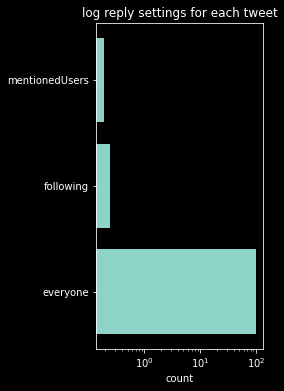

In [546]:
plt.figure(figsize = (3,6))
plt.barh(width=rsvcs, y=rsvcs.index, log = True)
plt.title("log reply settings for each tweet")
plt.xlabel('count');

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [547]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [548]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

In [549]:
np.logspace(0,5,5)

array([1.00000000e+00, 1.77827941e+01, 3.16227766e+02, 5.62341325e+03,
       1.00000000e+05])

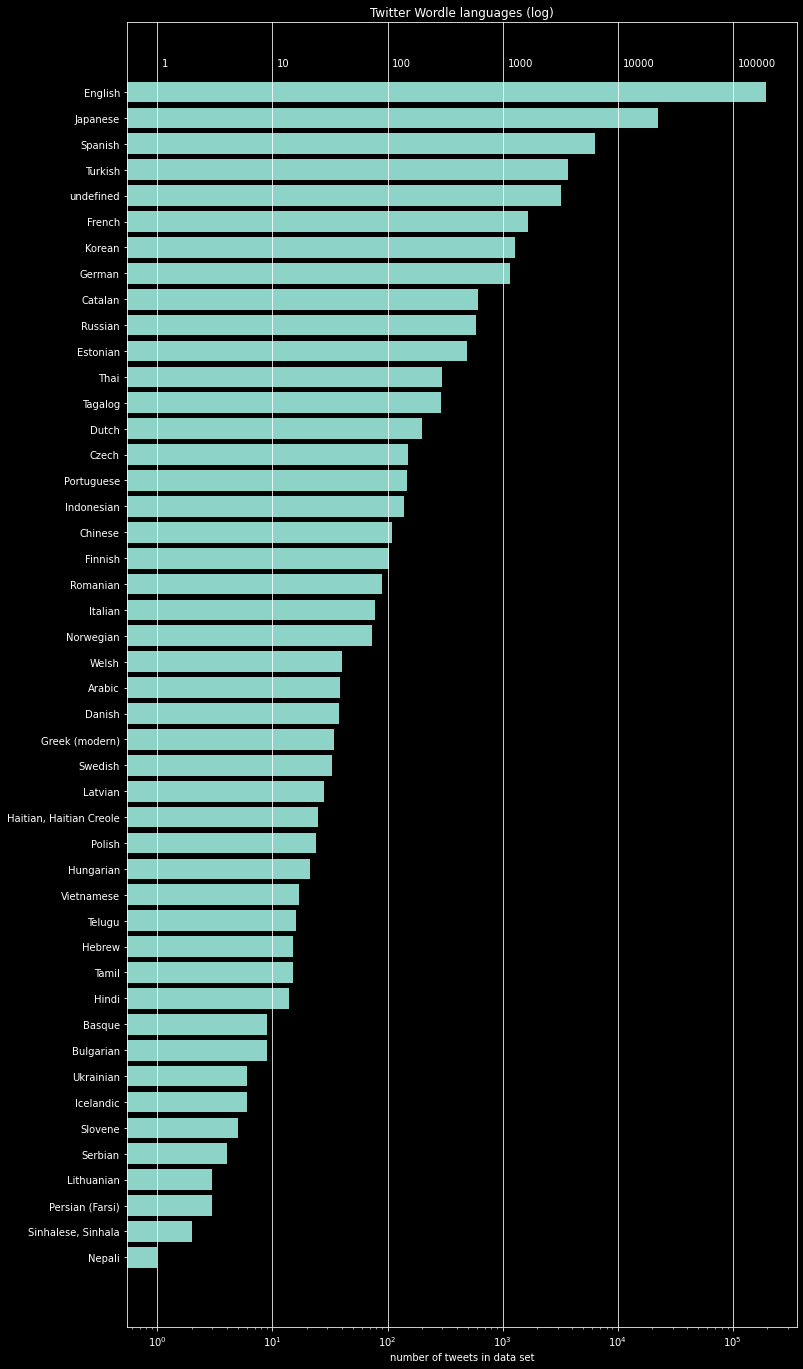

In [550]:
#plot languages


def plot_tweet_languages(pandas_dataframe, log = True, figsize = (12,24), num_text = True, reverse = True):
    lang_vcs = pandas_dataframe['lang'].value_counts()
    if reverse:
        lang_vcs = lang_vcs[::-1]
    lang_vcs_names = [
        lang_dict[lang]['name']
        for lang in lang_vcs.index
    ]
    fig = plt.figure(figsize=figsize)
    plt.grid(axis = 'x')
    plt.barh(width=lang_vcs, y=lang_vcs_names, log = log)
    plt.title('Twitter Wordle languages' + (' (log)' if log else ''))
    plt.xlabel("number of tweets in data set")
    if num_text:
        for xpos in np.logspace(0,5,6):
            plt.text(x = xpos*1.1, y = 46, s= str(int(xpos)))
    plt.show()
    return None

plot_tweet_languages(tudf)

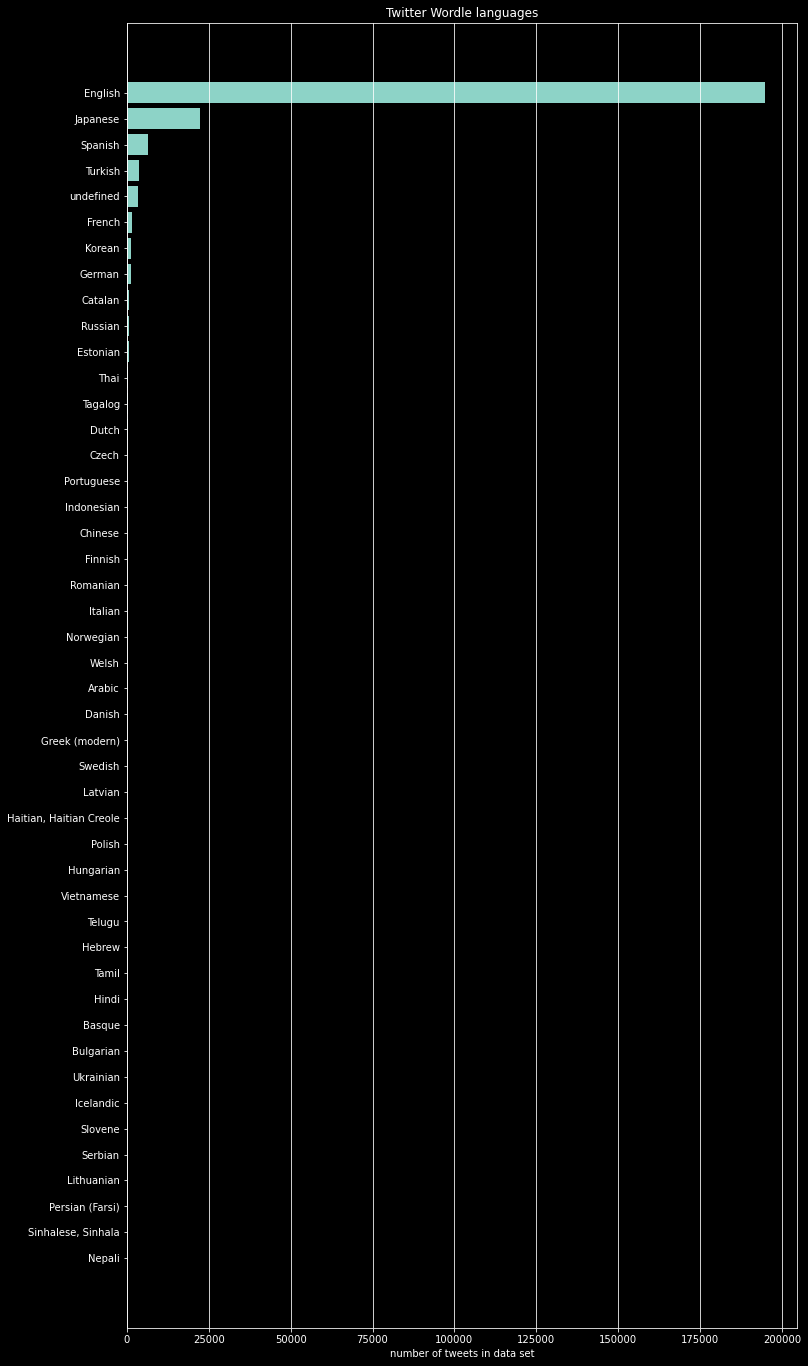

In [551]:
plot_tweet_languages(tudf, num_text=False, log = False)

---
### entities_tweet

These were `entities` in the tweets data. Entities are json-like columns with the following keys:

In [552]:
entities_tweet_keys = ['urls', 'mentions', 'hashtags', 'annotations', 'cashtags']

In [553]:
tudf['entities_tweet'].head()

tweet_id
1521730729775968257    {'urls': [{'start': 62, 'end': 85, 'url': 'htt...
1521730008259207168    {'urls': [{'start': 48, 'end': 71, 'url': 'htt...
1521729451511500800    {'urls': [{'start': 75, 'end': 98, 'url': 'htt...
1521728602018131969                                                   {}
1521728195023994880                                                   {}
Name: entities_tweet, dtype: object

In [554]:
# turn the entities_tweet column into a series of columns, one for each of the possible keys.
tudf = expand_json_cols(tudf, ['entities_tweet'], drop_json_cols=True)

In [555]:
tudf.head(3)

,conversation_id,reply_settings,lang,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 62, 'end': 85, 'url': 'https://t.co...","[{'start': 3, 'end': 12, 'username': 'chutypon...",NaN,NaN,NaN
1521730008259207168,1521730008259207168,everyone,en,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{},"[{'start': 48, 'end': 71, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1521729451511500800,1521729451511500800,everyone,es,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{},"[{'start': 75, 'end': 98, 'url': 'https://t.co...",NaN,NaN,NaN,NaN


In [556]:
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238108 entries, 1521730729775968257 to 1520127509051944961
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   conversation_id            238108 non-null  int64              
 1   reply_settings             238108 non-null  object             
 2   lang                       238108 non-null  object             
 3   possibly_sensitive         238108 non-null  bool               
 4   source                     238108 non-null  object             
 5   public_metrics_tweet       238108 non-null  object             
 6   text                       238108 non-null  object             
 7   context_annotations        238108 non-null  object             
 8   author_id                  238108 non-null  int64              
 9   created_at                 238108 non-null  datetime64[ns, UTC]
 10  referenced_tweets        

### entities_tweeturls
the first key in `entities_tweet`.

In [557]:
tudf['entities_tweeturls'].head()

tweet_id
1521730729775968257    [{'start': 62, 'end': 85, 'url': 'https://t.co...
1521730008259207168    [{'start': 48, 'end': 71, 'url': 'https://t.co...
1521729451511500800    [{'start': 75, 'end': 98, 'url': 'https://t.co...
1521728602018131969                                                  NaN
1521728195023994880                                                  NaN
Name: entities_tweeturls, dtype: object

In [558]:
entities_tweeturls_vcs = tudf['entities_tweeturls'].apply(lambda x: len(x) if type(x) == list else x).value_counts()
entities_tweeturls_vcs

1.0    57376
2.0      937
3.0       77
4.0       16
6.0        2
5.0        1
Name: entities_tweeturls, dtype: int64

In [653]:
expanded_tweet_urls = [
    entry
    for entry in tudf['entities_tweeturls'].dropna()
]
expanded_tweet_urls

[[{'start': 70,
   'end': 93,
   'url': 'https://t.co/1n1O5MPRPW',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'},
  {'start': 94,
   'end': 117,
   'url': 'https://t.co/tmznWGqc9h',
   'expanded_url': 'https://twitter.com/brunomgevo/status/1520127583047852032/photo/1',
   'display_url': 'pic.twitter.com/tmznWGqc9h',
   'media_key': '3_1520127579864420352'}],
 [{'start': 36,
   'end': 59,
   'url': 'https://t.co/svob0sbCHW',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'}],
 [{'start': 41,
   'end': 64,
   'url': 'https://t.co/GDhpi8s5up',
   'expanded_url': 'https://wordle.yuukun.dev',
   'display_url': 'wordle.yuukun.dev'}],
 [{'start': 54,
   'end': 77,
   'url': 'https://t.co/Y3Z2373e79',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'}],
 [{'start': 42,
   'end': 65,
   'url': 'https://t.co/kBcxqm0FcZ',
   'expanded_url': 'https://wordle.danielf

In [654]:
len(expanded_tweet_urls)

59044

entities_tweeturls appear to have a base set of keys, with `start` and `end` some integers that appear to typically be 23 characters long. This is the same length as the `url` string, which appears to be a twitter-specific "bit.ly" or "tiny url" style url. These also come with `expanded_url` and `display_url` which have the original url with or without the https:// prefix.

the `start` and `end` keys appear to be common amongst all of these entities. They give the location in the tweet text of the entity. I am largely uninterested in this location.

There are other keys: `media_key` is a string of format `num_numnumnum`

In [563]:
# get all linked urls.


### entities_tweetmentions

A list of users mentioned in the tweet. Includes the username and user id.

Each entry is a list of dicts. Each dict is itself a user.

In [564]:
expanded_tweet_mentions = [
    entry
    for entry in tudf['entities_tweetmentions'].dropna()
]
expanded_tweet_mentions

[[{'start': 3,
   'end': 12,
   'username': 'chutypon',
   'id': '1516012410993356811'}],
 [{'start': 3, 'end': 17, 'username': 'irimiabarroso', 'id': '194179893'}],
 [{'start': 0, 'end': 12, 'username': 'HalkatCurry', 'id': '410656713'}],
 [{'start': 3,
   'end': 19,
   'username': 'ModelAyshaMirza',
   'id': '1308419941851430917'}],
 [{'start': 0,
   'end': 15,
   'username': 'DrDreHistorian',
   'id': '703068717039497216'}],
 [{'start': 0,
   'end': 16,
   'username': 'StephanieReste5',
   'id': '1359994092474744833'}],
 [{'start': 0, 'end': 9, 'username': 'Chinmayi', 'id': '8443752'}],
 [{'start': 0, 'end': 10, 'username': 'Rod_Hagen', 'id': '18420742'}],
 [{'start': 0, 'end': 16, 'username': 'richardthewatts', 'id': '165748453'}],
 [{'start': 0, 'end': 11, 'username': 'Coltheman1', 'id': '892587355'}],
 [{'start': 0, 'end': 4, 'username': 'TOS', 'id': '12371162'}],
 [{'start': 0, 'end': 8, 'username': 'cccamac', 'id': '17686629'}],
 [{'start': 3, 'end': 17, 'username': 'razzleberr

In [565]:
# how many of these mentioned users are themselves tweeters in the list?

def get_mentioned_users(entities_mentioned_list, unique = False):
    extracted_mentions = []
    for this_entities_mentioned in entities_mentioned_list:
        for mentioned_user in this_entities_mentioned:
            extracted_mentions.append([mentioned_user['username'], mentioned_user['id']])
    if unique:
        return list(map(lambda extracted_mention: list(np.unique(extracted_mention)), extracted_mentions))
    return extracted_mentions

In [566]:
unique_mentioned_users = get_mentioned_users(expanded_tweet_mentions, unique=True)
unique_mentioned_users[:5]

[['1516012410993356811', 'chutypon'],
 ['194179893', 'irimiabarroso'],
 ['410656713', 'HalkatCurry'],
 ['1308419941851430917', 'ModelAyshaMirza'],
 ['703068717039497216', 'DrDreHistorian']]

In [567]:
type(unique_mentioned_users[0][0])

numpy.str_

In [568]:
#at least one of the user ids in this list is a missing hexadecimal for some reason.
#del(unique_mentioned_users[321])

In [569]:
#check how many users are in the posted users
mentioned_users_in_users_unique = [  
    int(mentioned_user[0]) in users.index
    for mentioned_user in unique_mentioned_users
    if mentioned_user[0].isnumeric()
]

np.mean(mentioned_users_in_users_unique)

0.21731166452316925

About 22% of mentioned users themselves are original posters. This is blind to replies, where mentions are automatically added to a tweet. The point is that over 3 out of 4 of these mentioned users aren't even posting completed Wordles themselves! Mentions may be a good way to spread the game via word-of-mouth, but one would need to track if these users eventually post themselves. Remember: a person posting their Wordle game is not IFF they played Wordle --- many of these people could be avid players.

In [570]:
#do the same for a list of non-unique mentions. Includes the user for every mention in the set, including repeats.
#for some reason, unique = True/False also switches the order of the username and id
all_mentioned_users = get_mentioned_users(entities_mentioned_list=expanded_tweet_mentions, unique= False)
mentioned_user_in_users = [  
    int(mentioned_user[1]) in users.index
    for mentioned_user in all_mentioned_users
    if mentioned_user[1].isnumeric()
]

np.mean(mentioned_user_in_users)

0.21712395407666862

This is almost the same. But a tiny bit smaller? That seems off.

### entities_tweethashtags

In [571]:
tudf['entities_tweethashtags'].dropna()

tweet_id
1521703481027211265    [{'start': 0, 'end': 3, 'tag': '한글'}, {'start'...
1521698149764632578       [{'start': 35, 'end': 45, 'tag': 'Wordle319'}]
1521692845534449664       [{'start': 53, 'end': 63, 'tag': 'Wordle319'}]
1521686936737484803    [{'start': 64, 'end': 75, 'tag': 'hadejSlova'}...
1521678055168643072      [{'start': 67, 'end': 78, 'tag': 'ポケモンWordle'}]
                                             ...                        
1520128136771371008      [{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]
1520128019846684672      [{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]
1520127925055799297    [{'start': 0, 'end': 3, 'tag': '한글'}, {'start'...
1520127913122832391            [{'start': 0, 'end': 7, 'tag': 'Wordle'}]
1520127652975321088      [{'start': 65, 'end': 76, 'tag': 'Enstarsdle'}]
Name: entities_tweethashtags, Length: 22176, dtype: object

In [572]:
len(tudf['entities_tweethashtags'].dropna())/len(tudf)

0.09313420800645085

about 9% of the tweets have at least one hashtag.

In [573]:
# get all hashtags
def get_all_hashtags(list_of_hashtag_lists, hashtag_key='tag', flat = True):
    if flat:
        complete_hashtag_list = []
        for hashtag_list in list_of_hashtag_lists:
            for hashtag_dict in hashtag_list:
                complete_hashtag_list.append(hashtag_dict[hashtag_key])
    else:
        complete_hashtag_list = [
            [
                hashtag_dict[hashtag_key]
                for hashtag_dict in hashtag_list
            ]
            for hashtag_list in list_of_hashtag_lists
        ]
    return complete_hashtag_list

all_hashtags_df = pd.DataFrame(get_all_hashtags(tudf['entities_tweethashtags'].dropna(), flat = True), columns = ["hashtag"])

In [574]:
#get list of hashtags by frequency
all_hashtags_df['hashtag'].value_counts()

ポケモンWordle    8930
Wordle        4208
wordle        1644
WordleCAT     1502
Wordle316      697
              ... 
beachlife        1
3HillsADay       1
Ooodle           1
おやすみ2            1
twinning         1
Name: hashtag, Length: 1525, dtype: int64

<BarContainer object of 20 artists>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12465 missing from c

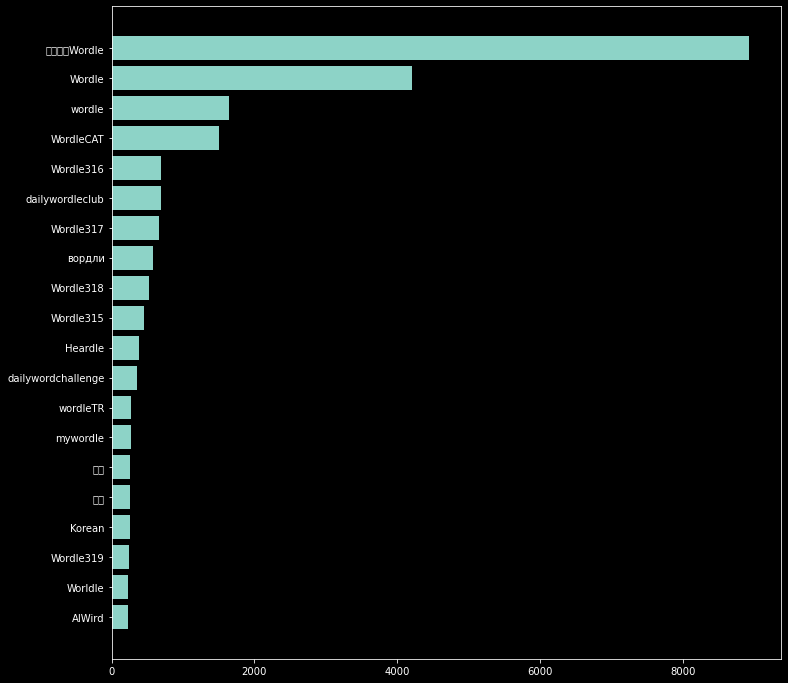

In [575]:
all_hashtags_vcs = all_hashtags_df['hashtag'].value_counts()[:20][::-1]
plt.figure(figsize = (12, 12))
plt.barh(width = all_hashtags_vcs, y = all_hashtags_vcs.index)

Foreign language characters aren't in the plotting font. The top result is `ポケモンWordle`, specifically a Pokemon Wordle clone popular in Japan.

Following are simply `Wordle` and `wordle`.

Fourth is `WordleCAT`, for Catalan.

Next, and further ahead, is `Wordle`XXX, a hashtag specifically for that day's Wordle, with XXX the number.

In [576]:
#get distributions of number of hashtags per tweet.
hashtag_num_distribution = pd.DataFrame(tudf['entities_tweethashtags'].apply(lambda x: len(x) if type(x) == list else 0))

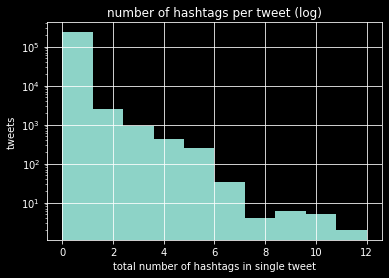

In [577]:
#plot hashtag count distribution.
hashtag_num_distribution['entities_tweethashtags'].hist(log = True)
plt.xlabel("total number of hashtags in single tweet")
plt.ylabel("tweets")
plt.title("number of hashtags per tweet (log)");

In [578]:
tudf['entities_tweethashtags'].dropna().iloc[0]

[{'start': 0, 'end': 3, 'tag': '한글'},
 {'start': 4, 'end': 7, 'tag': '워들'},
 {'start': 8, 'end': 15, 'tag': 'Korean'},
 {'start': 16, 'end': 23, 'tag': 'Wordle'}]

### entities_tweetsannotations

Twitter has a bunch of ids for topics and assigns probabilities that a tweet is about a certain topic.
It's cool that you can look up tweets by topic id. I guess that's how a lot of people stay on top of things for their own projects about a single topic.

[The docs](https://developer.twitter.com/en/docs/twitter-api/annotations/overview) have an overview of the kinds of entities things can be. Context annotations will be looked at ahead of this section.

In [579]:
tudf['entities_tweetannotations'].dropna()

tweet_id
1521652745195106304    [{'start': 137, 'end': 152, 'probability': 0.4...
1521650697829236736    [{'start': 4, 'end': 7, 'probability': 0.4351,...
1521648919624978432    [{'start': 0, 'end': 3, 'probability': 0.2838,...
1521647701477101568    [{'start': 18, 'end': 23, 'probability': 0.945...
1521646867074924546    [{'start': 0, 'end': 10, 'probability': 0.3633...
                                             ...                        
1520132680066682881    [{'start': 14, 'end': 20, 'probability': 0.341...
1520131320323604480    [{'start': 38, 'end': 49, 'probability': 0.990...
1520130474311565313    [{'start': 177, 'end': 195, 'probability': 0.3...
1520128535578488835    [{'start': 0, 'end': 21, 'probability': 0.9342...
1520128401662689284    [{'start': 55, 'end': 61, 'probability': 0.457...
Name: entities_tweetannotations, Length: 1614, dtype: object

In [580]:
tudf['entities_tweetannotations'].dropna().iloc[0]

[{'start': 137,
  'end': 152,
  'probability': 0.4919,
  'type': 'Person',
  'normalized_text': '🟩🟩🟩🟩🟩sorry'},
 {'start': 198,
  'end': 204,
  'probability': 0.5203,
  'type': 'Organization',
  'normalized_text': 'Twitter'}]

In [581]:
tudf['entities_tweetannotations'].dropna().iloc[1]

[{'start': 4,
  'end': 7,
  'probability': 0.4351,
  'type': 'Person',
  'normalized_text': 'Elon'}]

### entities_tweetscashtags

Very small number of tweets have a "cashtag." These were added as a way to keep track of stock prices. Perhaps it's a hashtag from a list of stock codes.

In [582]:
tudf.loc[tudf['entities_tweetcashtags'].dropna().index]

,conversation_id,reply_settings,lang,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521363122812030976,1521363122812030976,everyone,en,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 5/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟨🟩⬛⬛\r\n🟨🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1447577070465429510,2022-05-03 05:36:48+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,"[{'start': 69, 'end': 71, 'tag': 'h'}]"


### possibly_sensitive

Less than 1% of the tweets are marked as possibly_sensitive.

In [583]:
#get percentage of possibly_sensitive tweets
tudf['possibly_sensitive'].value_counts(normalize='yeah')

False    0.991554
True     0.008446
Name: possibly_sensitive, dtype: float64

In [584]:
tudf[tudf['possibly_sensitive']].head()

,conversation_id,reply_settings,lang,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521687479543377920,1521687479543377920,everyone,de,True,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wördl 319 X/6 🔥0\n\n⬜🟩⬜⬜⬜\n🟨🟩⬜🟨⬜\n⬜🟩⬜🟩🟩\n⬜🟩⬜🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",746747252115386368,2022-05-04 03:05:41+00:00,[],0.0,{},{},{},Maléry paní účetní,"{'followers_count': 7337, 'following_count': 5...",,Husa hloupá cosi kejhá.,https://pbs.twimg.com/profile_images/150305577...,extraterrestrial,False,halihuli,False,{},0.0,{},"[{'start': 55, 'end': 78, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1521686936737484803,1521686936737484803,everyone,cs,True,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",https://t.co/zARhT8OCbT den 109. [4/6]\n\n⬜🟨⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",746747252115386368,2022-05-04 03:03:31+00:00,[],0.0,{},{},{},Maléry paní účetní,"{'followers_count': 7337, 'following_count': 5...",,Husa hloupá cosi kejhá.,https://pbs.twimg.com/profile_images/150305577...,extraterrestrial,False,halihuli,False,{},0.0,{},"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,"[{'start': 64, 'end': 75, 'tag': 'hadejSlova'}...",NaN,NaN
1521646867074924546,1521646867074924546,everyone,en,True,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Evil Wordle: I won after 9 guesses\n\n⬜⬜⬜⬜⬜\n⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1480032197826465794,2022-05-04 00:24:18+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 91, 'end': 114, 'url': 'https://t.c...",NaN,NaN,"[{'start': 0, 'end': 10, 'probability': 0.3633...",NaN
1521643501124866048,1521643501124866048,everyone,ja,True,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ポケモンWordle 3/10\n\n⬛🟨⬛⬛⬛\n⬛🟨🟩⬛⬛\n🟩🟩🟩🟩🟩\n\nhttp...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",19233458,2022-05-04 00:10:56+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 36, 'end': 59, 'url': 'https://t.co...",NaN,"[{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]",NaN,NaN
1521642206603276289,1521642206603276289,everyone,ja,True,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ポケモンWordle 5/10\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n⬛🟨⬛⬛⬛\n⬛⬛🟨⬛⬛\...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",1294951567196483584,2022-05-04 00:05:47+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 48, 'end': 71, 'url': 'https://t.co...",NaN,"[{'start': 73, 'end': 84, 'tag': 'ポケモンWordle'}]",NaN,NaN


In [585]:
tudf[tudf['possibly_sensitive']]['lang'].value_counts()

en     900
ja     681
es     148
tr     113
fr      43
und     40
de      32
ko      22
ru      11
ca       8
cs       5
et       2
th       2
zh       1
tl       1
pt       1
da       1
Name: lang, dtype: int64

In [586]:
#language distribution of possibly_sensitive tweets

In [587]:
type(tudf[tudf['possibly_sensitive']])

pandas.core.frame.DataFrame

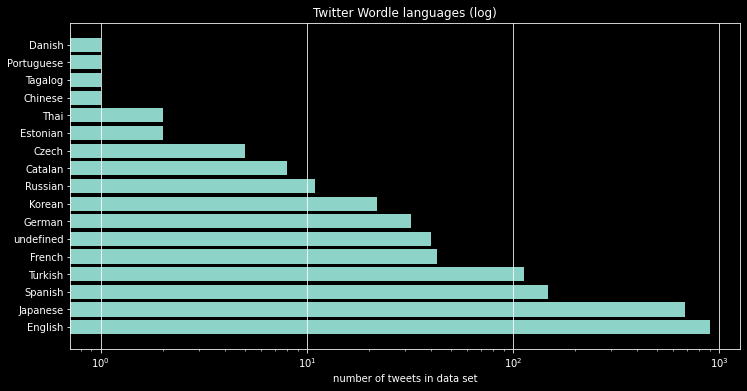

In [588]:
#language distribution of possibly_sensitive
plot_tweet_languages(tudf[tudf['possibly_sensitive']], figsize = (12,6), num_text=False, reverse = False)


In [589]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'possibly_sensitive',
       'source', 'public_metrics_tweet', 'text', 'context_annotations',
       'author_id', 'created_at', 'referenced_tweets', 'in_reply_to_user_id',
       'attachments', 'geo', 'withheld_tweet', 'name', 'public_metrics_user',
       'url', 'description', 'profile_image_url', 'location', 'protected',
       'username', 'verified', 'entities_user', 'pinned_tweet_id',
       'withheld_user', 'entities_tweeturls', 'entities_tweetmentions',
       'entities_tweethashtags', 'entities_tweetannotations',
       'entities_tweetcashtags'],
      dtype='object')

### Source

Source appears to be the name of the program that sent in the tweet. There are over 350 unique ones, with most of these applied to single tweets. The heavy hitters are unexpected popular programs.

|          software           |    fraction |
|:--------------------|-----------:|
| Twitter for iPhone  | 0.466511   |
| Twitter for Android | 0.340715   |
| Twitter Web App     | 0.137656   |
| Twitter for iPad    | 0.0271263  |
| TweetDeck           | 0.00942429 |
| Tweetbot for iΟS    | 0.00509013 |

In [590]:
#look at value counts
tudf['source'].value_counts()[:6]

Twitter for iPhone     111080
Twitter for Android     81127
Twitter Web App         32777
Twitter for iPad         6459
TweetDeck                2244
Tweetbot for iΟS         1212
Name: source, dtype: int64

In [591]:
#generate the table above
(tudf['source'].value_counts('normalize it')[:6]*100).to_markdown(index=True)

'|                     |    source |\n|:--------------------|----------:|\n| Twitter for iPhone  | 46.6511   |\n| Twitter for Android | 34.0715   |\n| Twitter Web App     | 13.7656   |\n| Twitter for iPad    |  2.71263  |\n| TweetDeck           |  0.942429 |\n| Tweetbot for iΟS    |  0.509013 |'

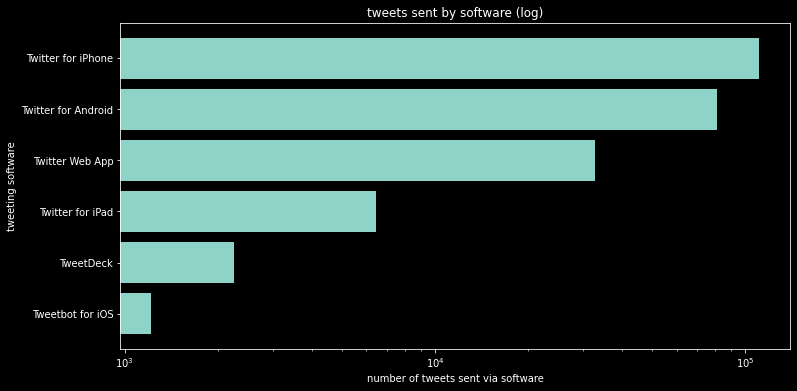

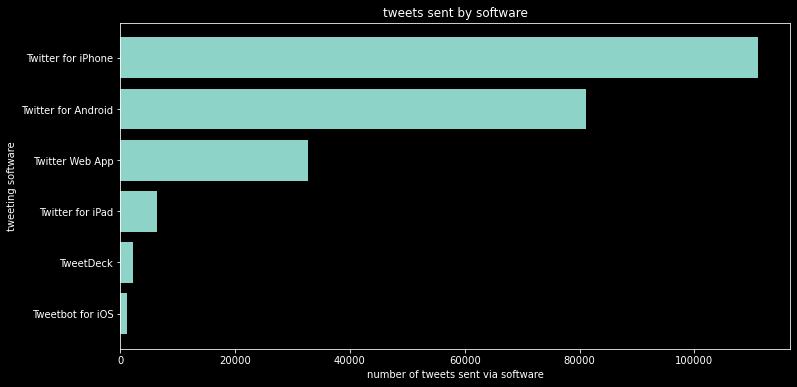

In [592]:
#plot them, both with log and linear scales.
top_source_vcs = tudf['source'].value_counts()[:6][::-1]

plt.figure(figsize = (12,6))
plt.barh(width = top_source_vcs, y=top_source_vcs.index, log = True)
plt.xlabel('number of tweets sent via software')
plt.ylabel("tweeting software")
plt.title("tweets sent by software (log)");
plt.show()


plt.figure(figsize = (12,6))
plt.barh(width = top_source_vcs, y=top_source_vcs.index, log = False)
plt.xlabel('number of tweets sent via software')
plt.ylabel("tweeting software")
plt.title("tweets sent by software");
plt.show()

### public_metrics_tweet

These consist of:
- retweet_count
- reply_count
- like_count
- quote_count

In [593]:
tudf['public_metrics_tweet'].iloc[0]

"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}"

In [594]:
#turn the public_metrics_tweet column into a series of columns.
# turn the entities_tweet column into a series of columns, one for each of the possible keys.
tudf = expand_json_cols(tudf, ['public_metrics_tweet'], drop_json_cols=True)

In [595]:
tudf[tudf.columns[-4:]].head()

,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,
1521730729775968257,1,0,0,0
1521730008259207168,0,0,0,0
1521729451511500800,0,0,0,0
1521728602018131969,0,0,0,0
1521728195023994880,0,0,0,0


### public_metrics_tweetretweet_count

The vast majority are not retweeted.

There are a few that were tweeted a huge number of times! 

In [596]:
tudf['public_metrics_tweetretweet_count'].value_counts()

0       235068
1         2389
2          238
3           84
4           55
35          37
10          34
34          32
8           28
21          19
23          16
5           16
12          13
11          10
6            8
7            7
18           5
16           4
30           4
72           3
9            3
134          3
71           3
14           2
131          2
345          2
2742         2
74           2
135          2
70           2
558          2
1713         1
121          1
41           1
343          1
24           1
263          1
19           1
184          1
69           1
32           1
40           1
961          1
1499         1
Name: public_metrics_tweetretweet_count, dtype: int64

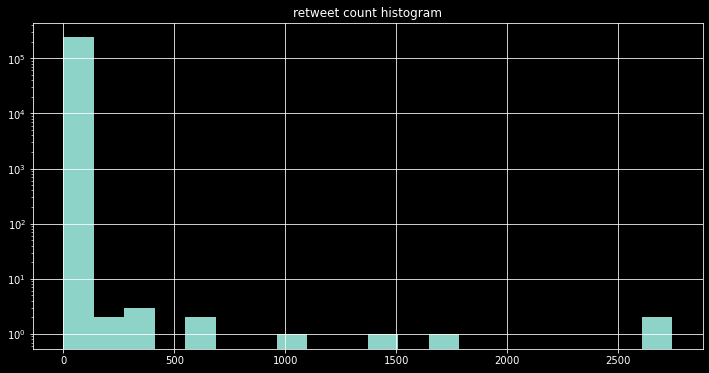

In [597]:
tudf['public_metrics_tweetretweet_count'].hist(bins = 20, log = True, figsize = (12,6))
plt.title("retweet count histogram");

In [598]:
tudf[tudf['public_metrics_tweetretweet_count'] > 500]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521292805355843587,1521292805355843587,everyone,en,False,Twitter for iPad,RT @VorosTwins: Today's Wordle is SUS\r\n\r\n⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",4473988098,2022-05-03 00:57:23+00:00,"[{'type': 'retweeted', 'id': '1516797822238031...",0.0,{},{},{},GOBBIFIED,"{'followers_count': 78, 'following_count': 198...",,"「Google LeShoes, at your service! (OUT OF ORDE...",https://pbs.twimg.com/profile_images/150529566...,,False,GlNGADENSETSU,False,{},1.492770e+18,{},NaN,"[{'start': 3, 'end': 14, 'username': 'VorosTwi...",NaN,"[{'start': 24, 'end': 29, 'probability': 0.379...",NaN,558,0,0,0
1521087200901103616,1521087200901103616,everyone,ko,False,Twitter Web App,RT @cehigi: #Wordle 중독증 3/6\r\n\r\n⬜⬜⬜⬜⬜\r\n⬜🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1432335794262343687,2022-05-02 11:20:23+00:00,"[{'type': 'retweeted', 'id': '1486992649982967...",0.0,{'media_keys': ['3_1486992170259476484']},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 47, 'end': 70, 'url': 'https://t.co...","[{'start': 3, 'end': 10, 'username': 'cehigi',...","[{'start': 12, 'end': 19, 'tag': 'Wordle'}]",NaN,NaN,961,0,0,0
1520845001495879685,1520845001495879685,everyone,en,False,Twitter Web App,RT @VorosTwins: Today's Wordle is SUS\n\n⬛🟩🟩🟩 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1062694393742802944,2022-05-01 19:17:58+00:00,"[{'type': 'retweeted', 'id': '1516797822238031...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,"[{'start': 3, 'end': 14, 'username': 'VorosTwi...",NaN,"[{'start': 24, 'end': 29, 'probability': 0.379...",NaN,558,0,0,0
1520740351178416128,1520740351178416128,everyone,en,False,Twitter Web App,RT @GeorgeNootFound: Wordle 229 X/6\r\n\r\n🟨🟨⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",945158559658110976,2022-05-01 12:22:08+00:00,"[{'type': 'retweeted', 'id': '1489268441374597...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,"[{'start': 3, 'end': 19, 'username': 'GeorgeNo...",NaN,NaN,NaN,2742,0,0,0
1520588597346578432,1520588597346578432,everyone,en,False,Twitter for iPhone,RT @Peace_wrwrd: Wordle 233 5/6\r\n\r\n⬛⬛⬛⬛⬛\r...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1479394890715140097,2022-05-01 02:19:07+00:00,"[{'type': 'retweeted', 'id': '1490626396485558...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,"[{'start': 3, 'end': 15, 'username': 'Peace_wr...",NaN,NaN,NaN,1499,0,0,0
1520496674656903178,1520496674656903178,everyone,en,False,Twitter for iPhone,RT @GeorgeNootFound: Wordle 229 X/6\r\n\r\n🟨🟨⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1366073394102476800,2022-04-30 20:13:51+00:00,"[{'type': 'retweeted', 'id': '1489268441374597...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,"[{'start': 3, 'end': 19, 'username': 'GeorgeNo...",NaN,NaN,NaN,2742,0,0,0
1520262808159588352,1520262808159588352,everyone,en,False,Twitter Web App,RT @cametek: Wordle 235\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛⬛⬛⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1330585341674315781,2022-04-30 04:44:33+00:00,"[{'type': 'retweeted', 'id': '1491263558923210...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,"[{'start': 3, 'end': 11, 'username': 'cametek'...",NaN,NaN,NaN,1713,0,0,0


![500+ RT tweet: today's wordle is sus.](./pix/sustweet.png)

This one is a retweet of a popular tweet with an Among Us nintendo character in it. The game led to a rise in the use of the word "sus" as short for suspicious.

Perhaps retweet counts are inherited by retweets.

All of the tweets with >500 retweets are themselves retweets.

### public_metrics_tweettweet_replycount

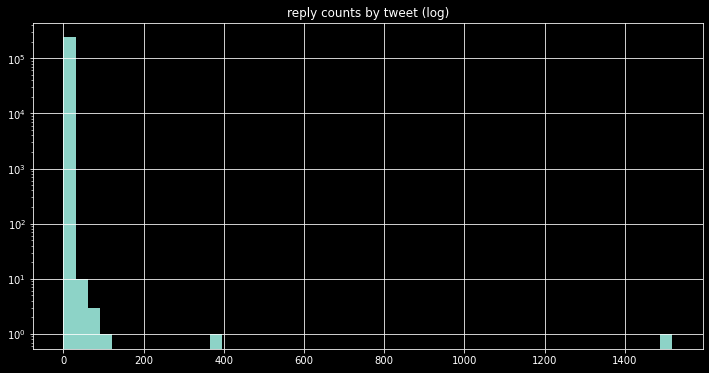

In [599]:
tudf['public_metrics_tweetreply_count'].hist(bins = 50,log = True, figsize = (12,6))
plt.title("reply counts by tweet (log)");

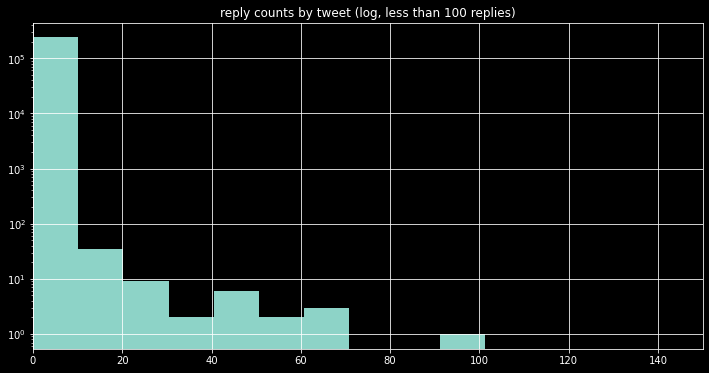

In [600]:
tudf['public_metrics_tweetreply_count'].hist(bins = 150,log = True, figsize = (12,6))
plt.title("reply counts by tweet (log, less than 100 replies)")
plt.xlim(0,150);

### public_metrics_tweetlike_count

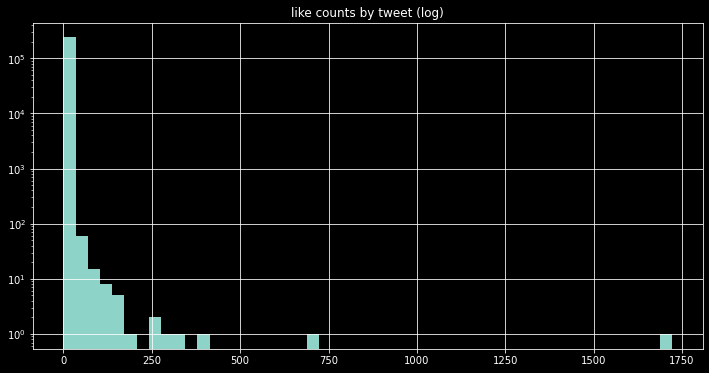

In [601]:
tudf['public_metrics_tweetlike_count'].hist(bins = 50,log = True, figsize = (12,6))
plt.title("like counts by tweet (log)");

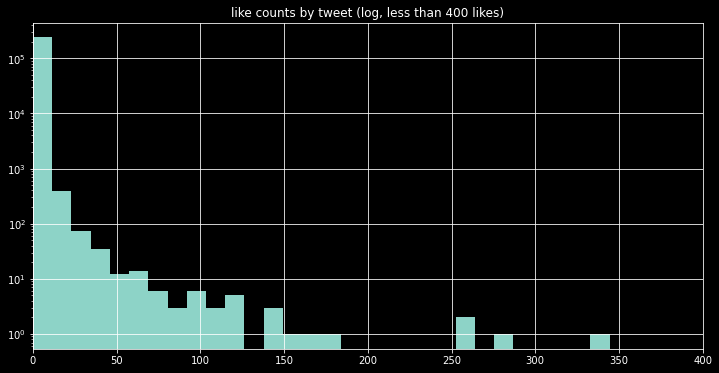

In [602]:
tudf['public_metrics_tweetlike_count'].hist(bins = 150,log = True, figsize = (12,6))
plt.title("like counts by tweet (log, less than 400 likes)")
plt.xlim(0,400);

In [603]:
#look at tweets with more than 250 likes
tudf[tudf['public_metrics_tweetlike_count'] > 250]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521446701801910272,1521446701801910272,everyone,en,False,Twitter for iPhone,Wordle 318 2/6*\r\n\r\n⬛🟩⬛⬛⬛\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1294500310191349760,2022-05-03 11:08:55+00:00,[],0.0,{},{},{},hannie ross,"{'followers_count': 283709, 'following_count':...",https://t.co/2yDWVPTkOK,main: @hannahxxrose | #rosetwt | banner: @neex...,https://pbs.twimg.com/profile_images/148368167...,,False,hanniexxrose,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.510697e+18,{},NaN,NaN,NaN,NaN,NaN,10,26,1722,0
1520833608272867328,1520833608272867328,everyone,en,False,Twitter Web App,Today was a tough one #Wordle315 \r\nWordle 31...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",17953972,2022-05-01 18:32:42+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,"[{'start': 22, 'end': 32, 'tag': 'Wordle315'}]",NaN,NaN,4,68,411,0
1520805744710356992,1520805744710356992,everyone,en,False,Twitter for iPhone,I’m giving a hint because the Wordle Master is...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",27491578,2022-05-01 16:41:59+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,"[{'start': 30, 'end': 42, 'probability': 0.408...",NaN,4,69,256,2
1520713571054850048,1520713571054850048,everyone,en,False,Twitter for Android,Wow\r\nWordle 316 6/6\r\n\r\n⬛⬛⬛⬛🟨\r\n⬛🟩🟩⬛⬛\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",381091977,2022-05-01 10:35:43+00:00,[],0.0,{'media_keys': ['3_1520713567443501057']},{},{},Arno/daily wordle😜/boots/music,"{'followers_count': 537, 'following_count': 28...",,"He/him. Musician. Be the best you can be, alw...",https://pbs.twimg.com/profile_images/151070535...,,False,arnojones1,False,{},0.000000e+00,{},"[{'start': 56, 'end': 79, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,23,6,286,0
1520644473142788097,1520644473142788097,everyone,en,False,Twitter for Android,Is it cheating to use a dictionary? \r\nWordle...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",454071012,2022-05-01 06:01:09+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,21,373,715,13
1520305212245827586,1520305212245827586,everyone,en,False,Twitter for Android,Tricky tonight\r\nWordle 315 4/6\r\n\r\n🟨⬜⬜⬜⬜\...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",454071012,2022-04-30 07:33:03+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,8,63,263,0
1520227908526415874,1520227908526415874,everyone,en,False,Twitter for iPhone,Wordle 315 5/6 another toughie \r\n\r\n⬛⬛⬛⬛⬛\r...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",57998991,2022-04-30 02:25:52+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,11,16,342,0


### public_metrics_tweetquote_count

Quoting is not a popular feature.

In [604]:
#number of quotes by fraction
tudf['public_metrics_tweetquote_count'].value_counts('nromalize')

0     0.996644
1     0.003288
2     0.000038
3     0.000013
5     0.000004
4     0.000004
7     0.000004
13    0.000004
Name: public_metrics_tweetquote_count, dtype: float64

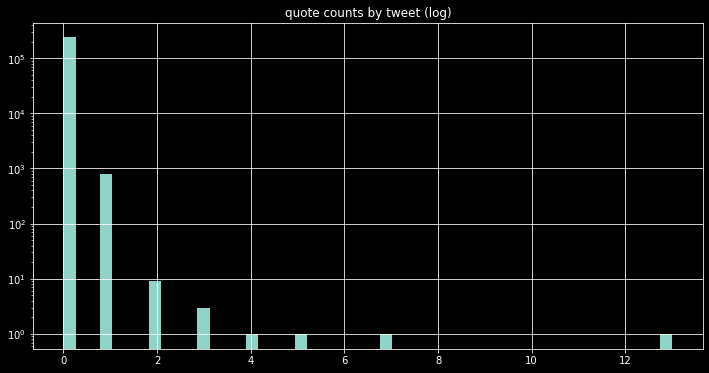

In [605]:
# plot quote number histogram
tudf['public_metrics_tweetquote_count'].hist(bins = 50,log = True, figsize = (12,6))
plt.title("quote counts by tweet (log)");

In [606]:
#look at tweets with quotes.
tudf[tudf['public_metrics_tweetquote_count'] > 0]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521905178840121346,1481853383686463490,everyone,en,False,Twitter for iPhone,PHEW! Saw plenty of people getting #wordle319 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",120237063,2022-05-04 17:30:44+00:00,"[{'type': 'replied_to', 'id': '152168665802602...",120237063.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,"[{'start': 35, 'end': 45, 'tag': 'wordle319'}]",NaN,NaN,0,0,0,1
1521904804355710976,1521904804355710976,everyone,en,False,Twitter Web App,It's been a very busy and difficult few weeks ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",58936320,2022-05-04 17:29:15+00:00,[],0.0,{},{},{},Erin Hunt,"{'followers_count': 2844, 'following_count': 9...",,"Disarming humanitarian, banning landmines, clu...",https://pbs.twimg.com/profile_images/135375972...,"Victoria, British Columbia",False,erinlynnhunt,False,"{'description': {'mentions': [{'start': 89, 'e...",0.0,{},NaN,NaN,NaN,NaN,NaN,0,0,2,1
1521903443887239171,1521903443887239171,everyone,ca,False,Twitter Web App,Wordle - Agencia I+D+i #6 4/6\r\n⬜🟨⬜\r\n🟩⬜🟨\r...,"[{'domain': {'id': '29', 'name': 'Events [Enti...",1237389893652713475,2022-05-04 17:23:51+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,1,3,1
1521901741327142913,1521901741327142913,everyone,und,False,Twitter for iPhone,เห้มาก Wordle 320 6/6\r\n\r\n⬛🟩⬛⬛⬛\r\n⬛🟩🟨⬛⬛\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",834802451857362946,2022-05-04 17:17:05+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,1
1521898576808488960,1521898576808488960,everyone,en,False,Twitter for Android,Wordle 319 3/6\r\n\r\n⬜⬜🟩🟨⬜\r\n⬜🟩🟩⬜🟩\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",90369086,2022-05-04 17:04:30+00:00,[],0.0,{},{},{},19.09,"{'followers_count': 620, 'following_count': 37...",,Once upon a time....,https://pbs.twimg.com/profile_images/151644720...,Botswana,False,Jinxjay,False,{},0.0,{},NaN,NaN,NaN,NaN,NaN,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520142360105136135,1520142360105136135,everyone,en,False,Twitter Web App,this was scary\r\nWordle 315 6/6\r\n\r\n⬜⬜🟨⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",761299287259119621,2022-04-29 20:45:56+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,1,1
1520136712160174080,1520136712160174080,everyone,en,False,Twitter for Android,Wordle 314 3/6\r\n\r\n⬜⬜🟩⬜🟩\r\n⬜🟩🟩🟨🟩\r\n🟩🟩🟩🟩🟩 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1291680662005612545,2022-04-29 20:23:29+00:00,"[{'type': 'quoted', 'id': '1519774540628385792'}]",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 34, 'end': 57, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,1,0,1
1520134128548859904,1520134128548859904,everyone,en,False,Twitter for Android,Wordle 315 5/6\r\n\r\n🟨⬜⬜⬜⬜\r\n⬜⬜⬜🟨⬜\r\n⬜🟨🟨⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",997862383946100737,2022-04-29 20:13:13+00:00,"[{'type': 'quoted', 'id': '1519739707877654528'}]",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 170, 'end': 193, 'url': 'https://t....",NaN,"[{'start': 66, 'end': 76, 'tag': 'WordleBot'},...",NaN,NaN,0,0,0,1


# Text

This is the text of the tweet! There are all sorts of things we could do with this. Tweets were specifically found using the search term `🟩 Wordle`, looking for any tweet with `Wordle` and `🟩`.

In 3_data_cleanup.ipynb, tweets with complete Wordle games had their games stripped from the text. These were saved as strings of digits, with 2 as 🟩, 1 as 🟨, and 0 as ⬛/⬜. They are all in a row, but the length is a multiple of 5, so the number of game rows is implied by `len(string)/5`.


### game

In [607]:
#import wordle games
wordle_games_path = '../merged_data/wordle_games.csv'
wordle_games = pd.read_csv(wordle_games_path, index_col = 'id')

In [608]:
wordle_games.head()

,wordle_games
id,
1521733018293084160,0012000120000220202222222
1521733015738662913,0000110002020020202222222
1521733011414257664,11000100202102122222
1521733010504445954,020102222022222
1521733001981444096,0020122222


In [609]:
wordle_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243245 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   wordle_games  243245 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [610]:
wordle_games.rename(columns={'wordle_games':'game'}, inplace = True)

In [611]:
#create new columns with info and statistics on the games.

#add encoded game to main dataframe
tudf = tudf.join(wordle_games)

### win

In [615]:
#whether a win occured. This is guessing the word in 6 or fewer tries.
tudf['win'] = tudf['game'].apply(lambda game: str(game)[-5:] == '22222')

In [616]:
#wins
tudf['win'].value_counts()

True     152774
False     89848
Name: win, dtype: int64

In [620]:
# That's a lot of wins, but there are a lot of tweets that aren't proper Wordles. Cut these out and look again.

#value counts for 'win' only for games with a non-null `game`
tudf.loc[tudf['game'].dropna().index]['win'].value_counts()

True     165724
False     10886
Name: win, dtype: int64

In [621]:
# value counts for wins by percentage
tudf.loc[tudf['game'].dropna().index]['win'].value_counts('mormamose')

True     0.938361
False    0.061639
Name: win, dtype: float64

about 94% of shared wordle games were winners. What do losing games look like?

In [633]:
tudf[tudf['win'] == False & tudf['game'].notna()] #.loc[1520127524377972737]['text']

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win
1520127509051944961,1520127509051944961,everyone,en,False,Twitter Web App,Wordle 314 4/6\r\n\r\n🟩⬛🟩🟨🟨\r\n🟩🟩🟩⬛🟨\r\n🟩🟩🟩🟩⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",489622686,2022-04-29 19:46:55+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,2,0,NaN,False
1520127524377972737,1520127524377972737,everyone,en,False,Twitter for iPhone,😈💅😈💅😈💅\r\n\r\nWordle 314 2/6\r\n\r\n🟩⬛🟩🟨🟨\r\n🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",25239815,2022-04-29 19:46:59+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,1,2,0,NaN,False
1520127566845149185,1520127566845149185,everyone,ja,False,Twitter Web App,Wordle 315 4/6\r\n\r\n⬜⬜🟨⬜⬜\r\n⬜⬜⬜🟨⬜\r\n⬜⬜⬜⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",176229015,2022-04-29 19:47:09+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
1520127576676704256,1520127576676704256,everyone,en,False,Twitter for iPhone,this is the best I've done so far \r\n\r\nWord...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1471956208181514243,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
1520127578593726464,1520127578593726464,everyone,ja,False,Twitter for iPhone,最近はめっきり知らない単語ばっかり。\r\n\r\nWordle 315 5/6\r\n\r...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1220315666508464130,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521911113276792832,1521911113276792832,everyone,en,False,Twitter Web App,Wordle 320 4/6\r\n🟨⬜🟨⬜⬜\r\n🟨🟩⬜⬜🟨\r\n🟨🟩⬜🟩🟩\r\n🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",388308798,2022-05-04 17:54:19+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,"[{'start': 40, 'end': 49, 'tag': 'Thwordle'}]",NaN,NaN,0,0,0,0,[],False
1521911299571027968,1521911299571027968,everyone,ko,False,Twitter Web App,지하철 워들(서울) 53 5/6 https://t.co/NNYL8IAj8z\r\n\...,[],3391648522,2022-05-04 17:55:04+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 18, 'end': 41, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,0,0,0,[],False
1521911584070967296,1521911584070967296,everyone,ja,False,Twitter for iPhone,ポケモンWordle 8/10\r\n\r\n🟨⬛⬛⬛⬛ ⬛⬛⬛🟩⬛\r\n⬛🟨⬛⬛⬛ ...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",155884554,2022-05-04 17:56:12+00:00,[],0.0,{},{},{},にゃかとにょり,"{'followers_count': 331, 'following_count': 81...",,サッカー（鹿島/京都兼任）、aiko、ラーメン。 eSリーグ、eFCヒューストンで3シーズン...,https://pbs.twimg.com/profile_images/126339831...,埼玉 上尾市,False,ikkun73,False,{},1.420162e+18,{},"[{'start': 69, 'end': 92, 'url': 'https://t.co...",NaN,"[{'start': 94, 'end': 105, 'tag': 'ポケモンWordle'}]",NaN,NaN,0,0,0,0,1000000020010000002010100222220002000020,False
1521911590915739651,1521911590915739651,everyone,ja,False,Twitter Web App,ポケモンWordle 6/10\r\n\r\n⬛⬛🟨⬛⬛ 🟩🟩🟩🟩🟩\r\n🟨⬛⬛🟩⬛\r...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",189764715,2022-05-04 17:56:13+00:00,[],0.0,{},{},{},れいちる＠ポケモン勢,"{'followers_count': 2219, 'following_count': 3...",https://t.co/qiEJFsqwiG,元Nsen02、現NECOsenの魔窟民\r\nフォロー返しは同じ趣味の人なら。\r\n好き...,https://pbs.twimg.com/profile_images/117127456...,静岡県富士市,False,metanaito6,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."

Many of these are still Pokemon wordles. They must be removed. There are likely lots of other Wordle alternatives that aren't easily traced by `lang`. It is probably a good idea to see how accurately I can pick out which language is which based on url links or other info.

In [637]:
#save the word pokemon in kana
pokemon_string = 'ポケモン'

#make a new column to keep track of pokemon games
poke_list = tudf['text'].apply(lambda text: pokemon_string in text)
tudf['is_poke'] = poke_list

In [642]:
# look at a couple of the pokemon wordles
tudf[tudf['is_poke']].head(2)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke
1520128019846684672,1520128019846684672,everyone,ja,False,Twitter for Android,ポケモンWordle 3/10\r\n\r\n⬛🟨⬛⬛⬛\r\n🟨⬛⬛⬛🟨\r\n🟩🟩🟩🟩🟩...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2410477404,2022-04-29 19:48:57+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 36, 'end': 59, 'url': 'https://t.co...",NaN,"[{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]",NaN,NaN,0,0,0,0,NaN,False,True
1520128136771371008,1520128136771371008,everyone,ja,False,Twitter for iPhone,ポケモンWordle 3/10\r\n\r\n⬛🟨⬛⬛⬛\r\n⬛🟨⬛🟩⬛\r\n🟩🟩🟩🟩🟩...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",751235352984055809,2022-04-29 19:49:25+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 36, 'end': 59, 'url': 'https://t.co...",NaN,"[{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]",NaN,NaN,0,0,0,0,NaN,False,True


Others are Wordle (ES) in Spanish, Wordle CAT for Catalan.

In [645]:
tudf[tudf['lang'] == 'es'].head(3)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke
1520127913122832391,1520127913122832391,everyone,es,False,Twitter Web App,#Wordle (ES) #113 4/6\r\n\r\n⬜⬜🟨🟨🟩\r\n🟨🟨⬜⬜🟩\r...,"[{'domain': {'id': '30', 'name': 'Entities [En...",11477652,2022-04-29 19:48:31+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 49, 'end': 72, 'url': 'https://t.co...",NaN,"[{'start': 0, 'end': 7, 'tag': 'Wordle'}]",NaN,NaN,0,0,0,0,NaN,False,False
1520128712515104769,1520128712515104769,everyone,es,False,Twitter for Android,"Word #119 (🇪🇸 - Clásico) - 4/6\r\nVersión app,...","[{'domain': {'id': '30', 'name': 'Entities [En...",26210001,2022-04-29 19:51:42+00:00,[],0.0,{},{'place_id': '01d487de3c4e0807'},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 93, 'end': 116, 'url': 'https://t.c...",NaN,"[{'start': 118, 'end': 125, 'tag': 'wordle'}, ...",NaN,NaN,0,0,0,0,NaN,False,False
1520128939758436352,1520128939758436352,everyone,es,False,Twitter for iPhone,Wordle Científico #47 6/6\r\n\r\n⬜🟨⬜⬜🟨⬜\r\n⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",346858116,2022-04-29 19:52:36+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 70, 'end': 93, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False


In [644]:
tudf[tudf['lang'] == 'ca'].head(3)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke
1520146347524956161,1520146347524956161,everyone,ca,False,Twitter for iPhone,Wordle (ES) #113 2/6\r\n\r\n⬜🟨🟩🟩🟩\r\n🟩🟩🟩🟩🟩\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1211913433928519680,2022-04-29 21:01:46+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,1,1,0,NaN,False,False
1520149798690738176,1480145315193831430,everyone,ca,False,Twitter Web App,Wordle 314 4/6\r\n\r\n⬜🟨⬜🟨⬜\r\n⬜⬜⬜🟨⬜\r\n🟩🟩🟩⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",223505019,2022-04-29 21:15:29+00:00,"[{'type': 'replied_to', 'id': '151964083010498...",223505019.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 83, 'end': 106, 'url': 'https://t.c...",NaN,NaN,NaN,NaN,0,1,0,0,NaN,False,False
1520158911550177281,1482290400471756803,everyone,ca,False,Twitter for Android,@wendolinpaz @Tana02265435 @TiritaTNT @oxigeno...,"[{'domain': {'id': '30', 'name': 'Entities [En...",278142338,2022-04-29 21:51:42+00:00,"[{'type': 'replied_to', 'id': '152015142908790...",278142338.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,"[{'start': 362, 'end': 385, 'url': 'https://t....","[{'start': 0, 'end': 12, 'username': 'wendolin...",NaN,NaN,NaN,0,1,4,0,NaN,False,False


I don't want to throw out games of English Wordle if someone is writing in Spanish otherwise in the tweet, for example, and Twitter assigns it 'es'. I should be able to filter these out. This could be done with links. Do legitimate Wordle tweets link to the nytimes page, or does Twitter find an associated link to them?

In [727]:
#list made in a previous section
expanded_tweet_urls


[[{'start': 70,
   'end': 93,
   'url': 'https://t.co/1n1O5MPRPW',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'},
  {'start': 94,
   'end': 117,
   'url': 'https://t.co/tmznWGqc9h',
   'expanded_url': 'https://twitter.com/brunomgevo/status/1520127583047852032/photo/1',
   'display_url': 'pic.twitter.com/tmznWGqc9h',
   'media_key': '3_1520127579864420352'}],
 [{'start': 36,
   'end': 59,
   'url': 'https://t.co/svob0sbCHW',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'}],
 [{'start': 41,
   'end': 64,
   'url': 'https://t.co/GDhpi8s5up',
   'expanded_url': 'https://wordle.yuukun.dev',
   'display_url': 'wordle.yuukun.dev'}],
 [{'start': 54,
   'end': 77,
   'url': 'https://t.co/Y3Z2373e79',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'}],
 [{'start': 42,
   'end': 65,
   'url': 'https://t.co/kBcxqm0FcZ',
   'expanded_url': 'https://wordle.danielf

In [758]:
just_the_urls_list = [
    [
        this_dict['expanded_url']
        for this_dict in this_list
    ]
    for this_list in expanded_tweet_urls
]

just_the_urls = pd.DataFrame(just_the_urls_list)

In [759]:
just_the_urls

,0,1,2,3,4,5
0,https://wordle.danielfrg.com/,https://twitter.com/brunomgevo/status/15201275...,None,None,None,None
1,https://wordle.danielfrg.com/,None,None,None,None,None
2,https://wordle.yuukun.dev,None,None,None,None,None
3,https://wordle.danielfrg.com/,None,None,None,None,None
4,https://wordle.danielfrg.com/,None,None,None,None,None
...,...,...,...,...,...,...
59039,https://wordle.danielfrg.com/,None,None,None,None,None
59040,https://wordle.mega-yadoran.jp/,None,None,None,None,None
59041,https://wordle.danielfrg.com/,None,None,None,None,None
59042,https://wordle.mega-yadoran.jp/,None,None,None,None,None


Some of the tweets have more than one url, up to 5. What's the distribution of these urls counts?

In [760]:
just_the_urls[0]

0          https://wordle.danielfrg.com/
1          https://wordle.danielfrg.com/
2              https://wordle.yuukun.dev
3          https://wordle.danielfrg.com/
4          https://wordle.danielfrg.com/
                      ...               
59039      https://wordle.danielfrg.com/
59040    https://wordle.mega-yadoran.jp/
59041      https://wordle.danielfrg.com/
59042    https://wordle.mega-yadoran.jp/
59043    https://wordle.mega-yadoran.jp/
Name: 0, Length: 59044, dtype: object

In [773]:
# get the numbers of tweets with each number of urls attached
filled_number = [len(tudf)]
for column_num in just_the_urls.columns:
    filled_number.append( (len(just_the_urls[column_num].dropna())))
    #need to subtract the number from all previous or else it counts the same tweet multiple times
    for j in range(column_num):
        filled_number[j] = filled_number[j] - filled_number[column_num]
filled_number

[182419, 57885, 923, 74, 16, 3, 2]

It looks like there are about 700 unaccounted for in this tally.

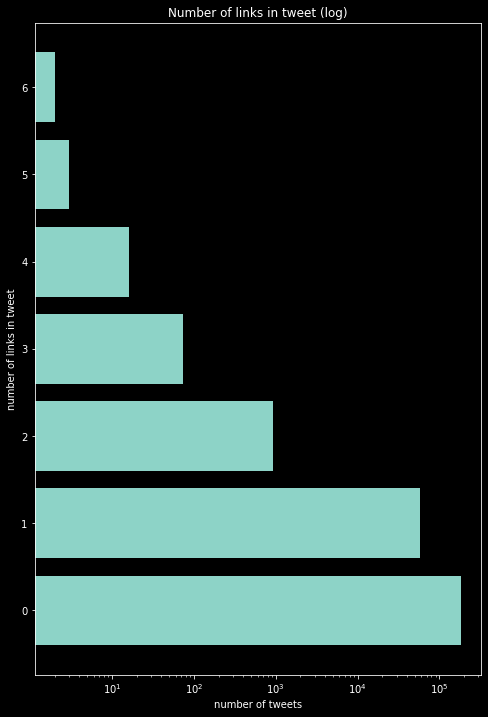

In [779]:
plt.figure(figsize = (8,12))
plt.barh(width = filled_number, y = range(0,7), log = True)
plt.title('Number of links in tweet (log)')
plt.xlabel('number of tweets')
plt.ylabel('number of links in tweet');

In [787]:
# get all the urls in a flat list.
all_url_list = list(np.concatenate(just_the_urls_list))

In [794]:
#make that list a series so we can call value_counts easily.
all_url_list_series = pd.Series(all_url_list)
all_url_list_series

0                            https://wordle.danielfrg.com/
1        https://twitter.com/brunomgevo/status/15201275...
2                            https://wordle.danielfrg.com/
3                                https://wordle.yuukun.dev
4                            https://wordle.danielfrg.com/
                               ...                        
60200                        https://wordle.danielfrg.com/
60201                      https://wordle.mega-yadoran.jp/
60202                        https://wordle.danielfrg.com/
60203                      https://wordle.mega-yadoran.jp/
60204                      https://wordle.mega-yadoran.jp/
Length: 60205, dtype: object

In [802]:
url_counts = all_url_list_series.value_counts()

<BarContainer object of 30 artists>

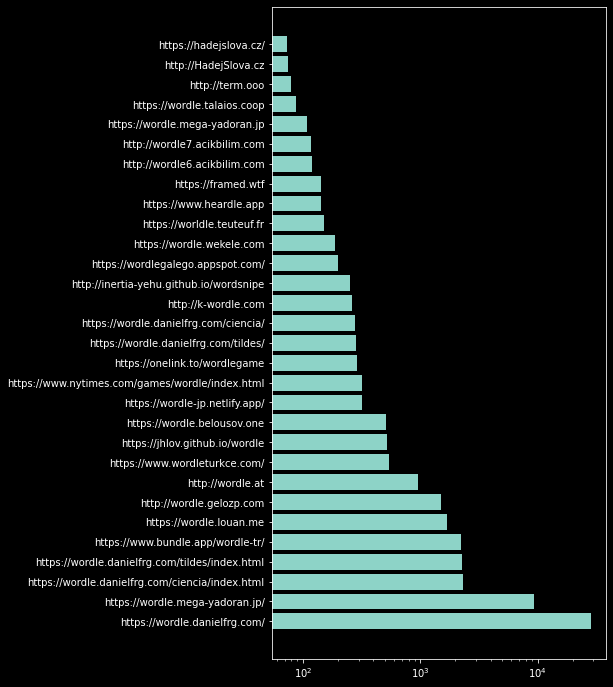

In [807]:
number_urls_to_plot = 30

plt.figure(figsize = (6,12))
plt.barh(width = url_counts[:number_urls_to_plot],
         y = url_counts[:number_urls_to_plot].index,
         log = True)

Most of these are foreign language alternatives:
- [wordle.danielfrg.com](wordle.danielfrg.com) is a Spanish language game
- [wordle.mega-yadoran.jp](https://wordle.mega-yadoran.jp/) is the Japanese language Pokemon Wordle
- [www.bundle.app/wordle-tr](http://www.bundle.app/wordle-tr) is Turkish
- [wordle.louan.me](https://wordle.louan.me) Le Mot - Wordle en français
- [wordle.gelozp.com](https://wordle.gelozp.com) Wordle CAT (Catalan)
- [wordle.at](http://wordle.at) is German (.at is for austria)
- [wordleturkce.com](http://www.wordleturkce.com/) is a(nother? or not?) Turkish variant.
- [https://jhlov.github.io/wordle/#/](https://jhlov.github.io/wordle/#/) Korean
- [belousov.one](https://wordle.belousov.one/) Russian
- [https://wordle-jp.netlify.app/](https://wordle-jp.netlify.app/) Japanese

# Tweet Rates, time.

In [23]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [24]:
tudf.sort_values(by = 'created_at', inplace= True)

In [25]:
tudf['wordle_tweet_number'] = range(len(tudf))

In [26]:
tudf['ones'] = np.ones(len(tudf))

In [27]:
time_diff = tudf['created_at'].max() -  tudf['created_at'].min()
time_diff.seconds

21757

In [28]:
tudf['wordle_tweet_rate'] = tudf['ones'][:-1]/list(map(lambda time: time.seconds,np.diff(tudf['created_at'])))

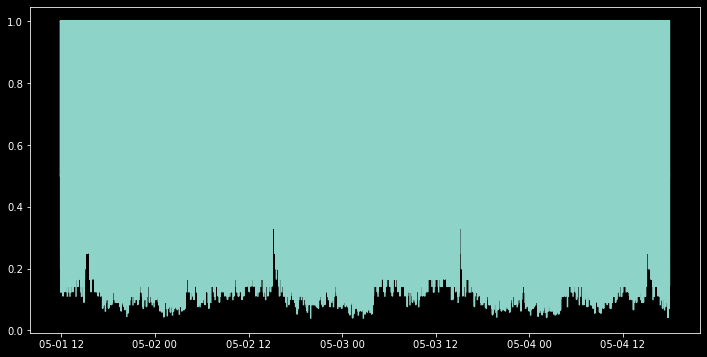

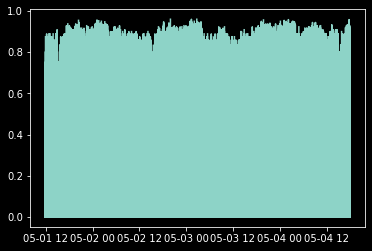

In [29]:
accumulated_tweets = np.linspace(0,len(tudf), len(tudf))
tweet_rate = [
    1/timespan.seconds
    for timespan in np.diff(tudf['created_at'].sort_values(ascending = True))
    if timespan.seconds != 0
]

# plt.figure(figsize = (12,6))
# plt.plot(tudf['created_at'].sort_values(ascending = True)[:-1], tweet_rate)
# # k= 2e7
# # plt.ylim(-k,k)
# plt.show()


plt.figure(figsize = (12,6))
plt.plot(tudf['created_at'], tudf['wordle_tweet_rate'])
plt.show()
plt.plot(tudf['created_at'], tudf['ones'] - tudf['wordle_tweet_rate'])

(0.0, 25.0)

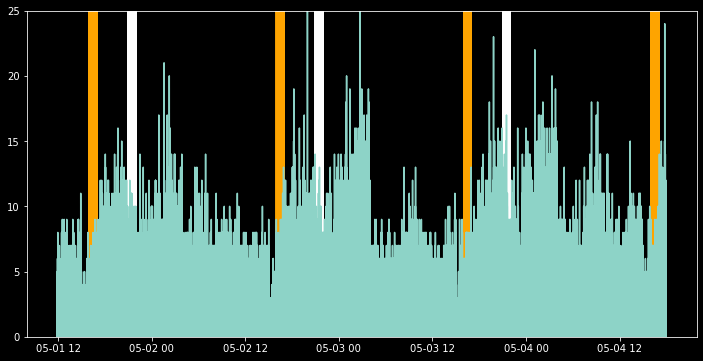

In [30]:
plt.figure(figsize = (12,6))
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'][:-1],np.diff(tudf['created_at'].apply(lambda x: x.second)) )
plt.ylim(0,25)

In [31]:
import datetime as dt

In [32]:
tudf['time_since_last_tweet'] = tudf['created_at'].diff().dt.total_seconds()

In [33]:
tudf['time_since_last_tweet']

tweet_id
1520733408237916161    NaN
1520733408607019008    0.0
1520733410947485702    0.0
1520733414999138310    1.0
1520733412725870592    0.0
                      ... 
1521911808176451586    1.0
1521911810563190785    1.0
1521911819077505026    2.0
1521911830817521664    2.0
1521911829244440577    0.0
Name: time_since_last_tweet, Length: 192115, dtype: float64

(0.0, 25.0)

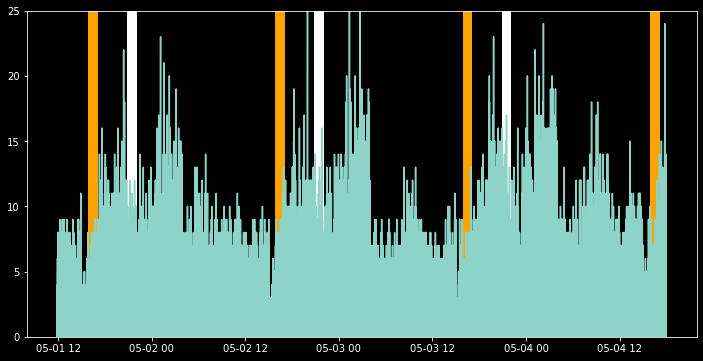

In [34]:
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet'] )
plt.ylim(0,25)

In [45]:
tudf['time_since_last_tweet_mean60'] = tudf['time_since_last_tweet'].rolling(60).mean() 

In [52]:
tudf['time_since_last_tweet_mean60'].mean()

1.4623534924891672

Text(0, 0.5, 'average wait time (s)')

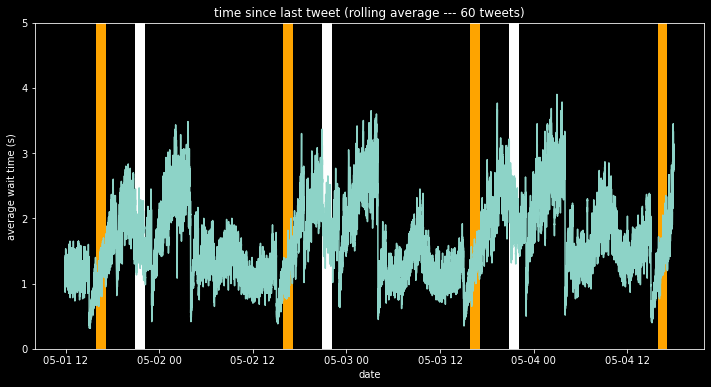

In [53]:
#do the same with rolling averages.
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

Text(0, 0.5, 'average wait time (s)')

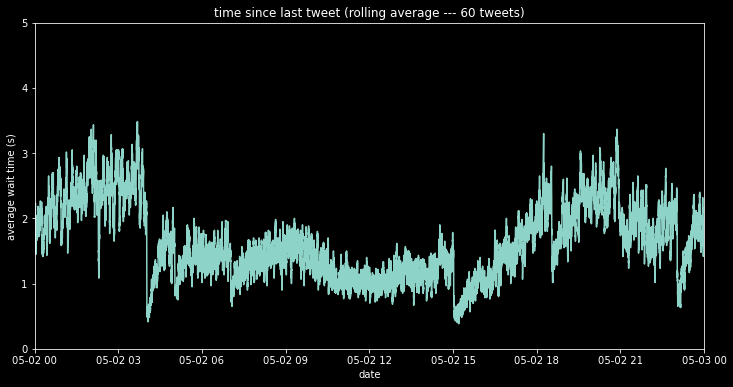

In [57]:
#plot rolling averages in one day.
plt.figure(figsize = (12,6))
plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

Text(2022-05-02 22:00:00+00:00, 2.0, '     France\n     Germany\n     Spain')

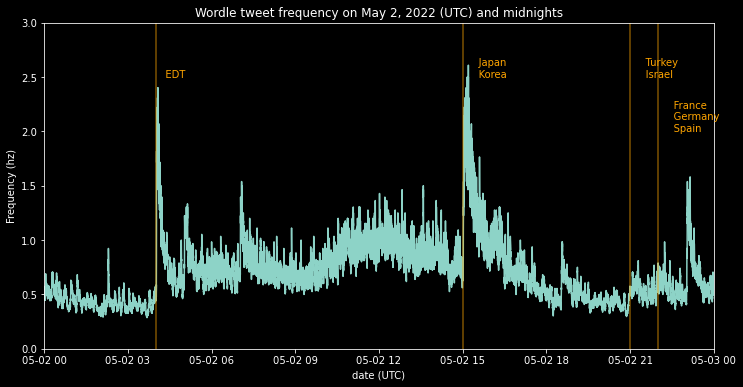

In [109]:
#plot the inverse. This is tweet frequency.

UTC = tz.gettz('UTC')

edt_offset = 4 # 4 am utc == midnight east coast usa. gmt -4
pdt_offset = 6 #6 am == midnight west coast usa. gmt -6
tokyo_offset = 15 # 3pm UTC == midnight japan, korea. gmt +9
turkey_offset = 21  # 9pm UTC == midnight turkey, israel. gmt +3
france_offset = 22 #10 pm UTC = midnight france, germany. gmt +2
canberra_offset = 14 # 2 pm UTC == midnight ACT eastern australia. GMT + 10

#more appropriately, should make tzinfo the corresponding type. but.
def midnight_datetime_may2(offset, tzinfo = UTC):
    midnight = datetime(2022, 5, 2, 0 + offset, 0, 0 ,tzinfo = tzinfo)
    return midnight

edt_midnight = midnight_datetime_may2(edt_offset)
tokyo_midnight =  midnight_datetime_may2(tokyo_offset)
turkey_midnight =  midnight_datetime_may2(turkey_offset)
france_midnight = midnight_datetime_may2(france_offset)


plt.figure(figsize = (12,6))
plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
plt.plot(tudf['created_at'], tudf['ones']/tudf['time_since_last_tweet_mean60'])
plt.ylim(0,3)
plt.title("Wordle tweet frequency on May 2, 2022 (UTC) and midnights")
plt.xlabel("date (UTC)")
plt.ylabel("Frequency (hz)")

plt.axvline(edt_midnight,  color = colors.to_rgba('orange',0.5))
plt.axvline(tokyo_midnight, color = colors.to_rgba('orange',0.5))
plt.axvline(turkey_midnight,  color = colors.to_rgba('orange',0.5))
plt.axvline(france_midnight,  color = colors.to_rgba('orange',0.5))

plt.text(edt_midnight, 2.5, "   EDT", color = 'orange')
plt.text(tokyo_midnight, 2.5, "     Japan\n     Korea", color = 'orange')
plt.text(turkey_midnight, 2.5, "     Turkey\n     Israel ", color = 'orange')
plt.text(france_midnight, 2., "     France\n     Germany\n     Spain", color = 'orange')

In [ ]:
#This is UTC, leading east coast USA by four hours. Some of these features definitely repeat.

# making the time series regular

The time data is irregular. Follow [this stack overflow](https://stackoverflow.com/questions/25234941/python-regularise-irregular-time-series-with-linear-interpolation) answer to use `traces` to make a regular time series.

> You can do this with traces. First, create a TimeSeries with your irregular measurements like you would a dictionary:
```python
    ts = traces.TimeSeries([
    (datetime(1992, 8, 27, 7, 46, 48), 28.0),
    (datetime(1992, 8, 27, 8, 0, 48), 28.2),
    ...
    (datetime(1992, 8, 27, 9, 3, 48), 30.0),
])
```

Then regularize using the sample method:

```python
    ts.sample(
    sampling_period=timedelta(minutes=15),
    start=datetime(1992, 8, 27, 8),
    end=datetime(1992, 8, 27, 9),
    interpolate='linear',
```
> This results in the following regularized version, where the gray dots are the original data and the orange is the regularized version with linear interpolation.

In [37]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install traces

[traces is pretty cool](https://traces.readthedocs.io/en/latest/#:~:text=The%20main%20object%20in%20traces,%3A45%3A56am%2C%20etc.&text=What%20if%20you%20want%20to,one%20of%20the%20measurement%20times.). It makes TimeSeries objects that interpolate between the data points by default. You can put any datetime in.

In [38]:
tudf['created_at']

tweet_id
1520733408237916161   2022-05-01 11:54:33+00:00
1520733408607019008   2022-05-01 11:54:33+00:00
1520733410947485702   2022-05-01 11:54:33+00:00
1520733414999138310   2022-05-01 11:54:34+00:00
1520733412725870592   2022-05-01 11:54:34+00:00
                                 ...           
1521911808176451586   2022-05-04 17:57:05+00:00
1521911810563190785   2022-05-04 17:57:06+00:00
1521911819077505026   2022-05-04 17:57:08+00:00
1521911830817521664   2022-05-04 17:57:10+00:00
1521911829244440577   2022-05-04 17:57:10+00:00
Name: created_at, Length: 192115, dtype: datetime64[ns, UTC]

In [39]:
import traces

from datetime import datetime

from dateutil import tz

In [40]:
#make a time series
ts = traces.TimeSeries(
        zip( tudf['created_at'],
            tudf['time_since_last_tweet_mean60']
        )
    )

tudf.iloc[0]['created_at']

Timestamp('2022-05-01 11:54:33+0000', tz='UTC')

In [41]:
#Give the time series tz awareness when making values.

UTC = tz.gettz('UTC')
ts[datetime(2042, 2, 1,  6,  0,  0, tzinfo = UTC)]

2.85

In [42]:
#make a histogram of the time series.
histogram = ts.distribution(
start=tudf['created_at'].min(),
end=tudf['created_at'].max()
)
histogram.median()

1.5333333333333334

In [43]:
histogram.standard_deviation(), histogram.mean(), histogram.max(), histogram.min()

(nan, nan, 3.9, nan)


## seasonal decomposing

I may not be able to do this without some conversion between the `traces` timeseries and however statsmodels works

In [44]:
ts[1]

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts)

plt.rc('figure', figsize(12,6))
decomp.plot();



In [ ]:
tudf['time_since_last_tweet']

In [ ]:
tudf['created_at'].apply(lambda x: x.second)

# geo and location

`geo` is a geocode corresponding to a location. They are also called `place_id`. The great majority of tweets do not have a geo code, but perhaps location could be gathered by the user, rather than the tweet itself.

According to [Get information about a place](https://developer.twitter.com/en/docs/twitter-api/v1/geo/place-information/api-reference/get-geo-id-place_id) in the Twitter docs,
> These IDs can be retrieved from geo/reverse_geocode.

`location` is a very general string.

In [ ]:

tudf.columns

In [ ]:
tudf['geo'].value_counts()

In [ ]:
len(tudf)

In [ ]:
#she/her is a location according to 239 of these

In [ ]:
tudf['location'].value_counts().head(30)

In [ ]:
tudf['entities_user'].iloc[2]

# User `entities`

I've called them `entities_user` in the merged df.

In [ ]:
json_list

In [ ]:
#the .replace("'", '"')
# must be done to replace single quotes with double quotes. otherwise it's not JSON.
json.loads(tudf['entities_user'].iloc[1].replace("'", '"'))

In [ ]:
json.loads()

In [ ]:
str.replace

### verified

In [234]:
tudf[tudf['verified'] == True]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521732483011678208,1521732483011678208,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟩🟨🟩\n⬜🟩🟩⬜🟩\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",21319630,...,https://t.co/ruI5hDjoCJ,Culture editor for https://t.co/BxsqjLzAG9. Ol...,https://pbs.twimg.com/profile_images/137802458...,"Salt Lake City, Utah",False,SeanPMeans,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
1521728105353678851,1521728105353678851,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟨⬜⬜\n⬜🟨⬜⬜🟩\n⬜🟨🟩🟩🟩\n🟩🟩🟩🟩🟩🏋️‍♀️,"[{'domain': {'id': '30', 'name': 'Entities [En...",20658431,...,https://t.co/u0IQ155nFc,Televisionary,https://pbs.twimg.com/profile_images/152146574...,Australia,False,Jabbatron,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.133909e+18,0
1521727958372737025,1510855326161117185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@IreneSGuadalupo @NisMorFer Wordle 319 4/6\n⬜🟨...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18690355,...,https://t.co/Zz9rgVMkU0,Desearía que más personas se preocuparan del m...,https://pbs.twimg.com/profile_images/143172254...,Segovia,False,Milhaud,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",9.941547e+17,0
1521726666585874434,1521726666585874434,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\n\n⬜⬜⬜⬜🟩\n⬜⬜🟨⬜🟩\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",189823957,...,0,Me encanta viajar por carreteras secundarias. ...,https://pbs.twimg.com/profile_images/146798198...,Murcia,False,garciaretegui,True,0,0.000000e+00,0
1521724243062366213,1521724243062366213,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟩⬛⬛⬛⬛\n🟨⬛⬛⬛⬛\n⬛🟩🟨🟨⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",19869814,...,https://t.co/9T1aAAFXt8,Sports journalist @the_hindu . FIA accredited ...,https://pbs.twimg.com/profile_images/142319722...,Chennai,False,dipakragav,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520735198828109824,1520735198828109824,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 14, 'like_...",Wordle 316 5/6\r\n\r\n⬜🟨⬜⬜⬜\r\n⬜⬜⬜⬜⬜\r\n⬜⬜🟩⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",23103351,...,https://t.co/xjEa5MGsYT,@EbonyMag #Power100 @Essence #Woke100. Prof. P...,https://pbs.twimg.com/profile_images/126838338...,Global,False,karenhunter,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.147608e+18,0
1520734510379323392,1520734510379323392,everyone,tr,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",Wordle Türkçe 316 4/6\r\n\r\n⬜⬜⬜⬜⬜\r\n🟩⬜⬜⬜⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",341071545,...,https://t.co/OByiy1t7Rj,"@kafadergisi yazarı, Oyuncu. iletişim: @gavsar...",https://pbs.twimg.com/profile_images/138310839...,İstanbul,False,celilnalcakan,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.512321e+18,0
1520733907217432578,1492893611825971204,everyone,en,0,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",Too many close calls here...\r\n\r\nWordle 316...,"[{'domain': {'id': '30', 'name': 'Entities [En...",32284383,...,https://t.co/04uDTeI5Ld,"Meteorologist with @CityNewsTO, @WGR